In [1]:
import pandas as pd
from google.colab import files

# === 1. Upload file dataset ===
uploaded = files.upload()  # Upload train_FD001.csv

# === 2. Load dataset ===
df = pd.read_csv("train_FD001.csv", delim_whitespace=True, header=None)

# Hapus kolom kosong (biasanya ada di CMAPSS)
df.dropna(axis=1, inplace=True)

# === 3. Tambahkan nama kolom sesuai dokumentasi CMAPSS ===
df.columns = [
    "unit_number", "time_in_cycles", "op_setting_1", "op_setting_2", "op_setting_3"
] + [f"sensor_{i}" for i in range(1, 22)]

# === 4. Pemeriksaan kualitas data ===

# 4.1 Cek dimensi dataset
print("Ukuran dataset:", df.shape)

# 4.2 Cek nilai kosong (missing values)
print("\nJumlah nilai kosong tiap kolom:")
print(df.isnull().sum())

# 4.3 Cek data duplikat
print("\nJumlah baris duplikat:", df.duplicated().sum())

# 4.4 Statistik deskriptif (cek distribusi dan sensor konstan)
print("\nRingkasan statistik sensor:")
print(df.describe().T.head(10))  # tampilkan ringkasan 10 kolom pertama

# 4.5 Identifikasi sensor bernilai konstan (tidak relevan)
const_sensors = [col for col in df.columns if df[col].nunique() == 1]
print("\nSensor bernilai konstan:", const_sensors)

# === 5. Preview data ===
print("\n5 baris pertama data:")
print(df.head())


Saving train_FD001.csv to train_FD001.csv
Ukuran dataset: (20631, 26)

Jumlah nilai kosong tiap kolom:
unit_number       0
time_in_cycles    0
op_setting_1      0
op_setting_2      0
op_setting_3      0
sensor_1          0
sensor_2          0
sensor_3          0
sensor_4          0
sensor_5          0
sensor_6          0
sensor_7          0
sensor_8          0
sensor_9          0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_15         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
dtype: int64

Jumlah baris duplikat: 0

Ringkasan statistik sensor:
                  count         mean           std        min        25%  \
unit_number     20631.0    51.506568  2.922763e+01     1.0000    26.0000   
time_in_cycles  20631.0   108.807862  6.888099e+01     1.0000    52.0000   
op_setting_1    20631.0    -0.000009  2.187313e-03    -0.0087    -0.0015   
op_se

/tmp/ipython-input-2871095357.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("train_FD001.csv", delim_whitespace=True, header=None)



Sensor bernilai konstan: ['op_setting_3', 'sensor_1', 'sensor_5', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']

5 baris pertama data:
   unit_number  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
0            1               1       -0.0007       -0.0004         100.0   
1            1               2        0.0019       -0.0003         100.0   
2            1               3       -0.0043        0.0003         100.0   
3            1               4        0.0007        0.0000         100.0   
4            1               5       -0.0019       -0.0002         100.0   

   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_12  \
0    518.67    641.82   1589.70   1400.60     14.62  ...     521.66   
1    518.67    642.15   1591.82   1403.14     14.62  ...     522.28   
2    518.67    642.35   1587.99   1404.20     14.62  ...     522.42   
3    518.67    642.35   1582.79   1401.87     14.62  ...     522.86   
4    518.67    642.37   1582.85   1406.22     

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# === 1. Load dataset (ganti path dengan file CMAPSS-mu) ===
df = pd.read_csv("train_FD001.csv", sep=" ", header=None)

# Hapus kolom kosong (biasanya ada kolom ekstra di dataset NASA)
df = df.dropna(axis=1, how='all')

# === 2. Tambahkan nama kolom ===
# Format FD001: [unit, cycle, 3 setting, 21 sensor]
col_names = ['unit', 'cycle', 'setting1', 'setting2', 'setting3'] + [f'sensor{i}' for i in range(1,22)]
df.columns = col_names

# === 3. Hapus kolom yang tidak relevan (misal setting kalau tidak dipakai) ===
df_clean = df.drop(columns=['setting1', 'setting2', 'setting3'])

# === 4. Normalisasi sensor (Min-Max Scaling) ===
scaler = MinMaxScaler()
sensor_cols = [f'sensor{i}' for i in range(1,22)]

df_clean[sensor_cols] = scaler.fit_transform(df_clean[sensor_cols])

# === 5. Simpan hasil preprocessing ke file CSV ===
df_clean.to_csv("FD001_preprocessed.csv", index=False)

print("✅ Preprocessing selesai!")
print("Preview data hasil preprocessing:")
print(df_clean.head())



✅ Preprocessing selesai!
Preview data hasil preprocessing:
   unit  cycle  sensor1   sensor2   sensor3   sensor4  sensor5  sensor6  \
0     1      1      0.0  0.183735  0.406802  0.309757      0.0      1.0   
1     1      2      0.0  0.283133  0.453019  0.352633      0.0      1.0   
2     1      3      0.0  0.343373  0.369523  0.370527      0.0      1.0   
3     1      4      0.0  0.343373  0.256159  0.331195      0.0      1.0   
4     1      5      0.0  0.349398  0.257467  0.404625      0.0      1.0   

    sensor7   sensor8  ...  sensor12  sensor13  sensor14  sensor15  sensor16  \
0  0.726248  0.242424  ...  0.633262  0.205882  0.199608  0.363986       0.0   
1  0.628019  0.212121  ...  0.765458  0.279412  0.162813  0.411312       0.0   
2  0.710145  0.272727  ...  0.795309  0.220588  0.171793  0.357445       0.0   
3  0.740741  0.318182  ...  0.889126  0.294118  0.174889  0.166603       0.0   
4  0.668277  0.242424  ...  0.746269  0.235294  0.174734  0.402078       0.0   

   sensor

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# --- 1. Load data (contoh FD001 dari CMAPSS) ---
df = pd.read_csv("train_FD001.csv", sep=" ", header=None)

# Buang kolom kosong akibat spasi berlebih
df.dropna(axis=1, how="all", inplace=True)

# Tambahkan nama kolom sesuai dokumentasi CMAPSS
column_names = ["unit", "cycle"] + [f"sensor{i}" for i in range(1, df.shape[1]-1)]
df.columns = column_names

# --- 2. Tampilkan Data Asli (HTML tabel putih) ---
print("🔹 Data asli:")
display(df.head(10))   # tampil 10 baris pertama, background putih

# --- 3. Normalisasi sensor (pakai MinMaxScaler) ---
scaler = MinMaxScaler()
sensor_cols = [c for c in df.columns if "sensor" in c]
df[sensor_cols] = scaler.fit_transform(df[sensor_cols])

# --- 4. Simpan data hasil preprocessing ---
df.to_csv("FD001_preprocessed.csv", index=False)

# --- 5. Tampilkan Data Hasil Preprocessing (HTML tabel putih) ---
print("\n✅ Preprocessing selesai!")
print("Preview data hasil preprocessing:")
pd.set_option("display.max_columns", None)  # biar semua kolom tampil
pd.set_option("display.width", None)

display(df.head(10))   # tampil 50 baris hasil preprocessing




🔹 Data asli:


,unit,cycle,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,...,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,sensor24
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694



✅ Preprocessing selesai!
Preview data hasil preprocessing:


,unit,cycle,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,sensor24
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,1.0,0.726248,0.242424,0.109755,0.0,0.369048,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,1.0,0.628019,0.212121,0.100242,0.0,0.380952,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,1.0,0.710145,0.272727,0.140043,0.0,0.250000,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,1.0,0.740741,0.318182,0.124518,0.0,0.166667,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,1.0,0.668277,0.242424,0.149960,0.0,0.255952,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502
5,1,6,0.252874,0.416667,0.0,0.0,0.268072,0.292784,0.272113,0.0,1.0,0.776167,0.181818,0.125415,0.0,0.184524,0.637527,0.220588,0.169832,0.330512,0.0,0.250000,0.0,0.0,0.651163,0.652720
6,1,7,0.557471,0.583333,0.0,0.0,0.382530,0.463920,0.261985,0.0,1.0,0.723027,0.181818,0.167818,0.0,0.303571,0.773987,0.220588,0.167097,0.278953,0.0,0.333333,0.0,0.0,0.744186,0.667219
7,1,8,0.304598,0.750000,0.0,0.0,0.406627,0.259865,0.316003,0.0,1.0,0.644122,0.151515,0.085569,0.0,0.232143,0.805970,0.220588,0.160646,0.318199,0.0,0.250000,0.0,0.0,0.643411,0.574979
8,1,9,0.545977,0.583333,0.0,0.0,0.274096,0.434707,0.211850,0.0,1.0,0.618357,0.227273,0.110967,0.0,0.261905,0.660981,0.250000,0.132883,0.184302,0.0,0.333333,0.0,0.0,0.705426,0.707539
9,1,10,0.310345,0.583333,0.0,0.0,0.150602,0.440375,0.307394,0.0,1.0,0.602254,0.227273,0.134479,0.0,0.107143,0.660981,0.264706,0.151925,0.399000,0.0,0.416667,0.0,0.0,0.627907,0.794256


In [4]:
import pandas as pd
from IPython.display import display

# preview 50 cycle pertama
display(df_clean.head(10))


,unit,cycle,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,0.0,0.183735,0.406802,0.309757,0.0,1.0,0.726248,0.242424,0.109755,0.0,0.369048,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662
1,1,2,0.0,0.283133,0.453019,0.352633,0.0,1.0,0.628019,0.212121,0.100242,0.0,0.380952,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014
2,1,3,0.0,0.343373,0.369523,0.370527,0.0,1.0,0.710145,0.272727,0.140043,0.0,0.250000,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375
3,1,4,0.0,0.343373,0.256159,0.331195,0.0,1.0,0.740741,0.318182,0.124518,0.0,0.166667,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386
4,1,5,0.0,0.349398,0.257467,0.404625,0.0,1.0,0.668277,0.242424,0.149960,0.0,0.255952,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502
5,1,6,0.0,0.268072,0.292784,0.272113,0.0,1.0,0.776167,0.181818,0.125415,0.0,0.184524,0.637527,0.220588,0.169832,0.330512,0.0,0.250000,0.0,0.0,0.651163,0.652720
6,1,7,0.0,0.382530,0.463920,0.261985,0.0,1.0,0.723027,0.181818,0.167818,0.0,0.303571,0.773987,0.220588,0.167097,0.278953,0.0,0.333333,0.0,0.0,0.744186,0.667219
7,1,8,0.0,0.406627,0.259865,0.316003,0.0,1.0,0.644122,0.151515,0.085569,0.0,0.232143,0.805970,0.220588,0.160646,0.318199,0.0,0.250000,0.0,0.0,0.643411,0.574979
8,1,9,0.0,0.274096,0.434707,0.211850,0.0,1.0,0.618357,0.227273,0.110967,0.0,0.261905,0.660981,0.250000,0.132883,0.184302,0.0,0.333333,0.0,0.0,0.705426,0.707539
9,1,10,0.0,0.150602,0.440375,0.307394,0.0,1.0,0.602254,0.227273,0.134479,0.0,0.107143,0.660981,0.264706,0.151925,0.399000,0.0,0.416667,0.0,0.0,0.627907,0.794256


In [5]:
import pandas as pd

# Load data hasil preprocessing
df = pd.read_csv("FD001_preprocessed.csv")

# Mapping sensor → komponen mesin
sensor_mapping = {
    "sensor2": "Fan Inlet Temp (T2)",
    "sensor3": "LPC Outlet Temp (T24)",
    "sensor4": "HPC Outlet Temp (T30)",
    "sensor7": "HPC Outlet Pressure (P30)",
    "sensor8": "Fan Speed (Nf)",
    "sensor9": "Core Speed (Nc)",
    "sensor11": "Bypass-duct Pressure (P2)",
    "sensor12": "Total Temp at LPT Outlet (T50)",
    "sensor13": "Physical Fan Speed",
    "sensor14": "Physical Core Speed",
    "sensor15": "Engine Pressure Ratio (EPR)",
    "sensor17": "High Pressure Turbine Cool Air Flow",
    "sensor20": "Fuel Flow",
    "sensor21": "Oil Pressure"
    # sisanya sensor dummy (0), bisa di-drop
}

# Ganti nama kolom di dataframe
df_renamed = df.rename(columns=sensor_mapping)

# Simpan ke Excel biar rapi
df_renamed.to_excel("FD001_preprocessed_with_components.xlsx", index=False)

print("✅ Data berhasil disimpan dengan nama komponen mesin")
print(df_renamed.head())


✅ Data berhasil disimpan dengan nama komponen mesin
   unit  cycle   sensor1  Fan Inlet Temp (T2)  LPC Outlet Temp (T24)  \
0     1      1  0.459770             0.166667                    0.0   
1     1      2  0.609195             0.250000                    0.0   
2     1      3  0.252874             0.750000                    0.0   
3     1      4  0.540230             0.500000                    0.0   
4     1      5  0.390805             0.333333                    0.0   

   HPC Outlet Temp (T30)   sensor5   sensor6  HPC Outlet Pressure (P30)  \
0                    0.0  0.183735  0.406802                   0.309757   
1                    0.0  0.283133  0.453019                   0.352633   
2                    0.0  0.343373  0.369523                   0.370527   
3                    0.0  0.343373  0.256159                   0.331195   
4                    0.0  0.349398  0.257467                   0.404625   

   Fan Speed (Nf)  Core Speed (Nc)  sensor10  Bypass-duct Pressu

In [ ]:
import pandas as pd
from google.colab import files

# Simpan hasil preprocessing ke Excel
df_clean.to_excel("preprocessing_output.xlsx", index=False)

# Download otomatis ke laptop
files.download("preprocessing_output.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# === 1. Load dataset ===
df = pd.read_csv("train_FD001.csv", sep=" ", header=None)
df.dropna(axis=1, inplace=True)  # hapus kolom kosong

# === 2. Tambahkan nama kolom ===
col_names = ["unit", "cycle"] + [f"sensor{i}" for i in range(1, df.shape[1]-1)]
df.columns = col_names

# === 3. Pilih sensor 1-21 ===
sensor_cols = [f"sensor{i}" for i in range(1, 22)]
sensor_data = df[sensor_cols].values

# === 4. Normalisasi pakai MinMaxScaler ===
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(sensor_data)
df_scaled = pd.DataFrame(data_scaled, columns=sensor_cols)

# === 5. Cek sensor konstan & variatif ===
constant_sensors = [col for col in df_scaled.columns if df_scaled[col].nunique() == 1]
variable_sensors = [col for col in df_scaled.columns if df_scaled[col].nunique() > 1]

print("🔹 Sensor konstan (tidak berguna):", constant_sensors)
print("🔹 Sensor variatif (berguna):", variable_sensors)

# === 6. Preview hasil normalisasi (rapi HTML putih) ===
df_scaled.head(20)   # cukup pakai ini, biar tampil HTML table putih


🔹 Sensor konstan (tidak berguna): ['sensor3', 'sensor4', 'sensor8', 'sensor13', 'sensor19', 'sensor21']
🔹 Sensor variatif (berguna): ['sensor1', 'sensor2', 'sensor5', 'sensor6', 'sensor7', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor20']


,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,1.0,0.726248,0.242424,0.109755,0.0,0.369048,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0
1,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,1.0,0.628019,0.212121,0.100242,0.0,0.380952,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0
2,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,1.0,0.710145,0.272727,0.140043,0.0,0.250000,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0
3,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,1.0,0.740741,0.318182,0.124518,0.0,0.166667,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0
4,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,1.0,0.668277,0.242424,0.149960,0.0,0.255952,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0
5,0.252874,0.416667,0.0,0.0,0.268072,0.292784,0.272113,0.0,1.0,0.776167,0.181818,0.125415,0.0,0.184524,0.637527,0.220588,0.169832,0.330512,0.0,0.250000,0.0
6,0.557471,0.583333,0.0,0.0,0.382530,0.463920,0.261985,0.0,1.0,0.723027,0.181818,0.167818,0.0,0.303571,0.773987,0.220588,0.167097,0.278953,0.0,0.333333,0.0
7,0.304598,0.750000,0.0,0.0,0.406627,0.259865,0.316003,0.0,1.0,0.644122,0.151515,0.085569,0.0,0.232143,0.805970,0.220588,0.160646,0.318199,0.0,0.250000,0.0
8,0.545977,0.583333,0.0,0.0,0.274096,0.434707,0.211850,0.0,1.0,0.618357,0.227273,0.110967,0.0,0.261905,0.660981,0.250000,0.132883,0.184302,0.0,0.333333,0.0
9,0.310345,0.583333,0.0,0.0,0.150602,0.440375,0.307394,0.0,1.0,0.602254,0.227273,0.134479,0.0,0.107143,0.660981,0.264706,0.151925,0.399000,0.0,0.416667,0.0


In [ ]:
import numpy as np

# === 7. Fungsi buat sequence (windowing) ===
def create_sequences(data, window_size=30):
    X = []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
    return np.array(X)

# === 8. Terapkan windowing pada data hasil normalisasi ===
window_size = 30  # panjang window (misalnya 30 cycle)
X_seq = create_sequences(data_scaled, window_size)

print("✅ Pembentukan deret waktu selesai!")
print("Shape data hasil windowing:", X_seq.shape)


✅ Pembentukan deret waktu selesai!
Shape data hasil windowing: (20601, 30, 21)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# === 1. Load dataset hasil preprocessing ===
df = pd.read_csv("FD001_preprocessed.csv")

# === 2. Ambil unit unik (mesin berbeda) ===
units = df["unit"].unique()

# === 3. Bagi unit menjadi train dan test (80% : 20%) ===
train_units, test_units = train_test_split(units, test_size=0.2, random_state=42)

# === 4. Filter data berdasarkan unit ===
train_df = df[df["unit"].isin(train_units)].reset_index(drop=True)
test_df  = df[df["unit"].isin(test_units)].reset_index(drop=True)

# === 5. Simpan hasil pembagian ===
train_df.to_csv("FD001_train_split.csv", index=False)
test_df.to_csv("FD001_test_split.csv", index=False)

print("✅ Data berhasil dipisah!")
print(f"Jumlah unit train : {len(train_units)}")
print(f"Jumlah unit test  : {len(test_units)}")
print(f"Shape data train  : {train_df.shape}")
print(f"Shape data test   : {test_df.shape}")


✅ Data berhasil dipisah!
Jumlah unit train : 80
Jumlah unit test  : 20
Shape data train  : (16561, 26)
Shape data test   : (4070, 26)


Detected sensor cols: ['sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21', 'sensor22', 'sensor23', 'sensor24']
Created sequences X_seq shape: (17731, 30, 24)
Example sequence (first sample):
 [[0.45977011 0.16666667 0.         0.         0.18373494 0.40680183
  0.30975692 0.         1.         0.72624799 0.24242424 0.109755
  0.         0.36904762 0.63326226 0.20588235 0.1996078  0.36398615
  0.         0.33333333 0.         0.         0.71317829 0.7246617 ]
 [0.6091954  0.25       0.         0.         0.28313253 0.4530194
  0.35263336 0.         1.         0.62801932 0.21212121 0.1002423
  0.         0.38095238 0.76545842 0.27941176 0.1628135  0.41131204
  0.         0.33333333 0.         0.         0.66666667 0.73101353]
 [0.25287356 0.75       0.         0.         0.34337349 0.36952256
  0.370

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30, 24)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 30, 64)         │        22,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 30, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30, 64)         │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 30, 24)         │         1,560 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,264 (196.34 KB)

 Trainable params: 50,264 (196.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0315

444/444 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - loss: 0.0314 - val_loss: 0.0065
Epoch 2/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0086

444/444 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - loss: 0.0086 - val_loss: 0.0063
Epoch 3/30
443/444 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0078

444/444 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - loss: 0.0078 - val_loss: 0.0063
Epoch 4/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0074

444/444 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - loss: 0.0074 - val_loss: 0.0062
Epoch 5/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0072

444/444 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - loss: 0.0072 - val_loss: 0.0061
Epoch 6/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - loss: 0.0070 - val_loss: 0.0061
Epoch 7/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0069

444/444 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - loss: 0.0069 - val_loss: 0.0061
Epoch 8/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0067

444/444 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - loss: 0.0067 - val_loss: 0.0061
Epoch 9/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0067

444/444 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - loss: 0.0067 - val_loss: 0.0061
Epoch 10/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0066

444/444 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - loss: 0.0066 - val_loss: 0.0061
Epoch 11/30
443/444 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0065

444/444 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - loss: 0.0065 - val_loss: 0.0060
Epoch 12/30
443/444 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0065

444/444 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - loss: 0.0065 - val_loss: 0.0060
Epoch 13/30
443/444 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0065

444/444 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - loss: 0.0065 - val_loss: 0.0060
Epoch 14/30
443/444 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0065

444/444 ━━━━━━━━━━━━━━━━━━━━ 46s 60ms/step - loss: 0.0065 - val_loss: 0.0060
Epoch 15/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - loss: 0.0065 - val_loss: 0.0060
Epoch 16/30
443/444 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0064

444/444 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - loss: 0.0064 - val_loss: 0.0060
Epoch 17/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0064

444/444 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - loss: 0.0064 - val_loss: 0.0060
Epoch 18/30
443/444 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0064

444/444 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - loss: 0.0064 - val_loss: 0.0059
Epoch 19/30
443/444 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0063

444/444 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 20/30
443/444 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0063

444/444 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 21/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0063

444/444 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 0.0063 - val_loss: 0.0058
Epoch 22/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0062

444/444 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 23/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0062

444/444 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 24/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0062

444/444 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - loss: 0.0062 - val_loss: 0.0057
Epoch 25/30
443/444 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0062

444/444 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - loss: 0.0062 - val_loss: 0.0057
Epoch 26/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0061

444/444 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - loss: 0.0061 - val_loss: 0.0057
Epoch 27/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0061

444/444 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - loss: 0.0061 - val_loss: 0.0056
Epoch 28/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0060

444/444 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 29/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0060

444/444 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 30/30
443/444 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0060

444/444 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - loss: 0.0060 - val_loss: 0.0055


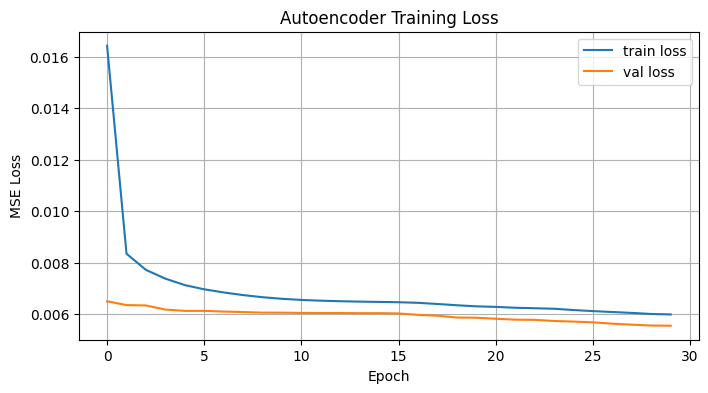

555/555 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step
MSE per sample shape: (17731,)
MSE stats: min=0.003519, median=0.005367, mean=0.005806, max=0.013497
Selected threshold (95th pct): 0.009034920483546401


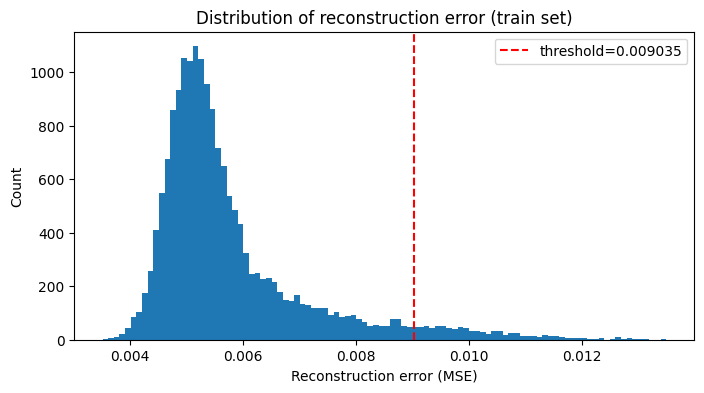

Model & threshold saved.


In [ ]:
# === Autoencoder (LSTM) untuk data sequence ===
# Prasyarat: file "FD001_preprocessed.csv" sudah ada OR kamu sudah punya X_seq numpy array
# Jika belum punya X_seq, kode di bawah akan membuatnya dari CSV.

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import os

# ---------------------------
# 1) Parameter (ubah jika perlu)
# ---------------------------
CSV_PATH = "FD001_preprocessed.csv"   # file hasil preprocessing (jika ada)
use_csv_to_create_seq = True          # jika True, buat X_seq dari CSV; jika False, gunakan X_seq yang sudah ada
window_size = 30
batch_size = 32
epochs = 30
val_split = 0.2
model_save_path = "lstm_autoencoder.h5"
history_save_path = "ae_history.npy"
random_seed = 42
os.environ['PYTHONHASHSEED'] = str(random_seed)
tf.random.set_seed(random_seed)
np.random.seed(random_seed)

# ---------------------------
# 2) Jika perlu: buat sequences dari CSV
# ---------------------------
def create_sequences_from_df(df, sensor_cols, window_size=30):
    """Buat sliding windows per unit (agar tidak melewati batas unit).
       Mengembalikan array shape (n_samples, window_size, n_features)."""
    X_list = []
    # Asumsi df memiliki kolom 'unit' dan 'cycle'
    for unit in df['unit'].unique():
        sub = df[df['unit'] == unit].sort_values('cycle')
        arr = sub[sensor_cols].values
        if len(arr) <= window_size:
            continue
        for i in range(len(arr) - window_size + 1):
            X_list.append(arr[i:i+window_size])
    return np.array(X_list)

if use_csv_to_create_seq:
    df = pd.read_csv(CSV_PATH)
    # tentukan kolom sensor secara otomatis (kolom selain unit & cycle)
    sensor_cols = [c for c in df.columns if c not in ['unit','cycle']]
    print("Detected sensor cols:", sensor_cols)
    # buat sequence
    X_seq = create_sequences_from_df(df, sensor_cols, window_size=window_size)
    print("Created sequences X_seq shape:", X_seq.shape)
else:
    # Jika kamu sudah punya X_seq di memori, jangan isi ini.
    # Contoh: X_seq = np.load('X_seq.npy')
    raise RuntimeError("Set use_csv_to_create_seq=True or provide X_seq manually.")

# Optional: jika kamu ingin mengecek sample
print("Example sequence (first sample):\n", X_seq[0][:3])  # tampil 3 timestep pertama

# ---------------------------
# 3) Bangun model LSTM Autoencoder
# ---------------------------
n_timesteps = X_seq.shape[1]
n_features = X_seq.shape[2]

def build_lstm_autoencoder(timesteps, features,
                           latent_dim=16,
                           enc_units=64,
                           dec_units=64,
                           dropout_rate=0.2):
    inp = layers.Input(shape=(timesteps, features))
    # Encoder
    x = layers.LSTM(enc_units, activation='tanh', return_sequences=True)(inp)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.LSTM(latent_dim, activation='tanh', return_sequences=False)(x)
    # Bottleneck representation (optionally can add Dense)
    latent = layers.RepeatVector(timesteps)(x)
    # Decoder
    x = layers.LSTM(dec_units, activation='tanh', return_sequences=True)(latent)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.TimeDistributed(layers.Dense(features, activation='linear'))(x)
    model = models.Model(inputs=inp, outputs=x)
    return model

# buat model
latent_dim = 16
enc_units = 64
dec_units = 64
dropout_rate = 0.2

model = build_lstm_autoencoder(n_timesteps, n_features,
                               latent_dim=latent_dim,
                               enc_units=enc_units,
                               dec_units=dec_units,
                               dropout_rate=dropout_rate)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='mse')

model.summary()

# ---------------------------
# 4) Callbacks
# ---------------------------
es = callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
ckpt = callbacks.ModelCheckpoint(model_save_path, monitor='val_loss',
                                 save_best_only=True, save_weights_only=False)

# ---------------------------
# 5) Latih model (Autoencoder)
# ---------------------------
history = model.fit(X_seq, X_seq,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=val_split,
                    callbacks=[es, ckpt],
                    shuffle=True)

# simpan history
np.save(history_save_path, history.history)

# ---------------------------
# 6) Visualisasi kurva loss
# ---------------------------
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Autoencoder Training Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# 7) Prediksi & hitung reconstruction error (MSE per sample)
# ---------------------------
X_pred = model.predict(X_seq, batch_size=batch_size)
# MSE per sample: rata-rata MSE di seluruh timestep & feature
mse_per_sample = np.mean(np.square(X_seq - X_pred), axis=(1,2))
print("MSE per sample shape:", mse_per_sample.shape)
print("MSE stats: min=%.6f, median=%.6f, mean=%.6f, max=%.6f" % (
    mse_per_sample.min(), np.median(mse_per_sample),
    mse_per_sample.mean(), mse_per_sample.max()
))

# ---------------------------
# 8) Tentukan threshold (mis: 95th percentile dari mse_per_sample)
# ---------------------------
threshold = np.percentile(mse_per_sample, 95)   # ubah percentile jika perlu
print("Selected threshold (95th pct):", threshold)

plt.figure(figsize=(8,4))
plt.hist(mse_per_sample, bins=100)
plt.axvline(threshold, color='r', linestyle='--', label=f'threshold={threshold:.6f}')
plt.xlabel('Reconstruction error (MSE)')
plt.ylabel('Count')
plt.title('Distribution of reconstruction error (train set)')
plt.legend()
plt.show()

# ---------------------------
# 9) Simpan model & threshold
# ---------------------------
# model sudah disimpan oleh ModelCheckpoint; simpan threshold juga
with open("ae_threshold.txt", "w") as f:
    f.write(str(threshold))

print("Model & threshold saved.")


In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data sequence menjadi train dan validation
x_train, x_val = train_test_split(X_seq, test_size=0.2, random_state=42)
print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)


x_train shape: (14184, 30, 24)
x_val shape: (3547, 30, 24)


Trial 5 Complete [00h 06m 39s]
val_loss: 0.006334251724183559

Best val_loss So Far: 0.006232760846614838
Total elapsed time: 00h 29m 34s

=== Best Hyperparameters ===
enc_units: 64
latent_dim: 24
dec_units: 96
dropout1: 0.4
dropout2: 0.0
learning_rate: 0.01
Epoch 1/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 34s 61ms/step - loss: 0.0194 - val_loss: 0.0073
Epoch 2/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - loss: 0.0073 - val_loss: 0.0068
Epoch 3/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 4/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 5/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 25s 56ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 6/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - loss: 0.0064 - val_loss: 0.0064
Epoch 7/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 25s 56ms/step - loss: 0.0064 - val_loss: 0.0064
Epoch 8/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - loss: 0.0064 - val_loss: 0.0065
Epoch 9/30
444/444 ━━━━━━━━━━━━━━━━━━

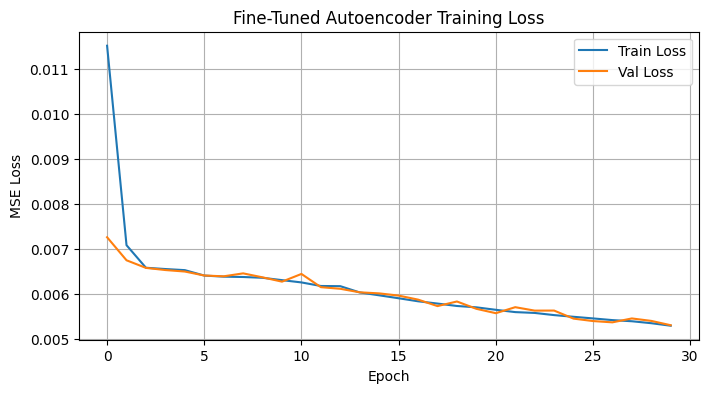

111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step
Reconstruction Error Stats:
Min=0.003555, Median=0.005047, Mean=0.005312, Max=0.014206
Selected threshold (95th pct): 0.007624771640504051


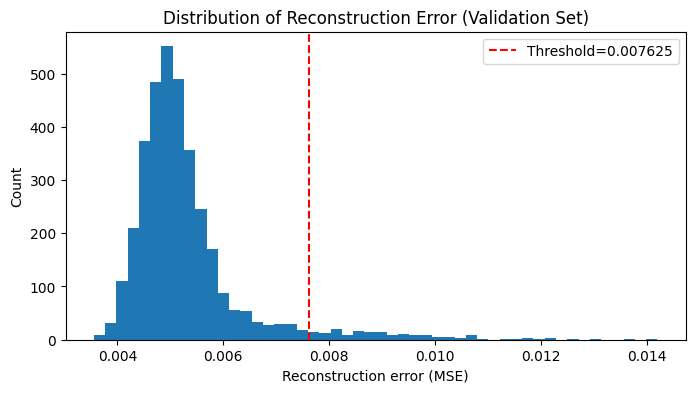

In [ ]:
# =====================================
# LSTM Autoencoder + Hyperparameter Tuning (Keras Tuner)
# =====================================
!pip install -q keras-tuner

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras_tuner as kt

# ---------------------------
# 1) Load Data (hasil preprocessing)
# ---------------------------
CSV_PATH = "FD001_preprocessed.csv"
window_size = 30

def create_sequences_from_df(df, sensor_cols, window_size=30):
    """Buat sliding windows per unit (agar tidak melewati batas unit)."""
    X_list = []
    for unit in df['unit'].unique():
        sub = df[df['unit'] == unit].sort_values('cycle')
        arr = sub[sensor_cols].values
        if len(arr) <= window_size:
            continue
        for i in range(len(arr) - window_size + 1):
            X_list.append(arr[i:i+window_size])
    return np.array(X_list)

df = pd.read_csv(CSV_PATH)
sensor_cols = [c for c in df.columns if c not in ['unit','cycle']]
X_seq = create_sequences_from_df(df, sensor_cols, window_size=window_size)
print("Created sequences:", X_seq.shape)

# ---------------------------
# 2) Split data train & val
# ---------------------------
x_train, x_val = train_test_split(X_seq, test_size=0.2, random_state=42)
print("Train:", x_train.shape, "Val:", x_val.shape)

# ---------------------------
# 3) Build Autoencoder (untuk Tuner)
# ---------------------------
timesteps = X_seq.shape[1]
features = X_seq.shape[2]

def build_autoencoder(hp):
    inp = layers.Input(shape=(timesteps, features))
    # Encoder
    x = layers.LSTM(
        units=hp.Int("enc_units", min_value=32, max_value=128, step=32),
        return_sequences=True
    )(inp)
    x = layers.Dropout(hp.Float("dropout1", 0.0, 0.5, step=0.1))(x)
    x = layers.LSTM(
        units=hp.Int("latent_dim", min_value=8, max_value=32, step=8),
        return_sequences=False
    )(x)
    # Bottleneck
    latent = layers.RepeatVector(timesteps)(x)
    # Decoder
    x = layers.LSTM(
        units=hp.Int("dec_units", min_value=32, max_value=128, step=32),
        return_sequences=True
    )(latent)
    x = layers.Dropout(hp.Float("dropout2", 0.0, 0.5, step=0.1))(x)
    out = layers.TimeDistributed(layers.Dense(features, activation="linear"))(x)

    model = models.Model(inputs=inp, outputs=out)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])
        ),
        loss="mse"
    )
    return model

# ---------------------------
# 4) Tuning Hyperparameter
# ---------------------------
tuner = kt.RandomSearch(
    build_autoencoder,
    objective="val_loss",
    max_trials=5,            # coba 5 kombinasi (bisa ditambah kalau mau)
    executions_per_trial=1,
    directory="tuner_autoencoder",
    project_name="cmapss"
)

tuner.search(x_train, x_train,
             epochs=10, batch_size=32,
             validation_data=(x_val, x_val),
             verbose=1)

# ---------------------------
# 5) Ambil model terbaik & train ulang
# ---------------------------
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\n=== Best Hyperparameters ===")
print("enc_units:", best_hps.get('enc_units'))
print("latent_dim:", best_hps.get('latent_dim'))
print("dec_units:", best_hps.get('dec_units'))
print("dropout1:", best_hps.get('dropout1'))
print("dropout2:", best_hps.get('dropout2'))
print("learning_rate:", best_hps.get('learning_rate'))

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    x_train, x_train,
    epochs=30,
    batch_size=32,
    validation_data=(x_val, x_val),
    verbose=1
)

# ---------------------------
# 6) Plot loss curve
# ---------------------------
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Fine-Tuned Autoencoder Training Loss')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# 7) Rekonstruksi & Threshold
# ---------------------------
X_pred = best_model.predict(x_val, batch_size=32)
mse_per_sample = np.mean(np.square(x_val - X_pred), axis=(1,2))
threshold = np.percentile(mse_per_sample, 95)

print("Reconstruction Error Stats:")
print("Min=%.6f, Median=%.6f, Mean=%.6f, Max=%.6f" % (
    mse_per_sample.min(), np.median(mse_per_sample),
    mse_per_sample.mean(), mse_per_sample.max()
))
print("Selected threshold (95th pct):", threshold)

plt.figure(figsize=(8,4))
plt.hist(mse_per_sample, bins=50)
plt.axvline(threshold, color='r', linestyle='--', label=f'Threshold={threshold:.6f}')
plt.xlabel('Reconstruction error (MSE)')
plt.ylabel('Count')
plt.title('Distribution of Reconstruction Error (Validation Set)')
plt.legend()
plt.show()


555/555 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step
mse_per_seq shape: (17731,)
X_seq shape: (17731, 30, 24)
seq_labels shape: (17731,)
Distribusi label: normal=16844, anomaly=887
Train: (14184, 30, 24) Test: (3547, 30, 24)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 64)         │        22,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,873 (218.25 KB)

 Trainable params: 55,873 (218.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9508 - loss: 0.1704 - val_accuracy: 0.9612 - val_loss: 0.0754
Epoch 2/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9670 - loss: 0.0733 - val_accuracy: 0.9665 - val_loss: 0.0644
Epoch 3/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.9705 - loss: 0.0664 - val_accuracy: 0.9746 - val_loss: 0.0542
Epoch 4/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 29s 64ms/step - accuracy: 0.9725 - loss: 0.0615 - val_accuracy: 0.9806 - val_loss: 0.0458
Epoch 5/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.9786 - loss: 0.0539 - val_accuracy: 0.9792 - val_loss: 0.0463
Epoch 6/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9802 - loss: 0.0513 - val_accuracy: 0.9813 - val_loss: 0.0392
Epoch 7/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.9831 - loss: 0.0474 - val_accuracy: 0.9820 - val_loss: 0.0378
Epoch 8/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.9837 - loss: 0.0452 - 

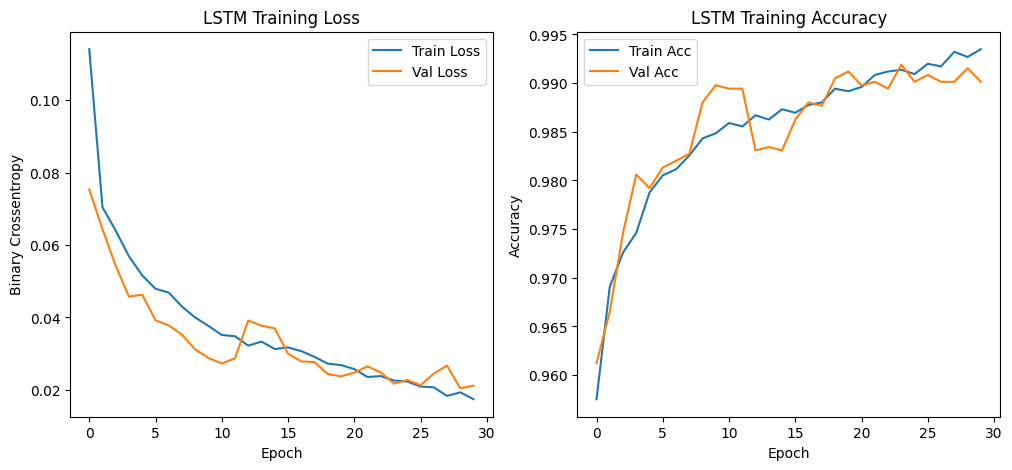

111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9953    0.9979    0.9966      3370
           1     0.9583    0.9096    0.9333       177

    accuracy                         0.9935      3547
   macro avg     0.9768    0.9538    0.9650      3547
weighted avg     0.9934    0.9935    0.9934      3547



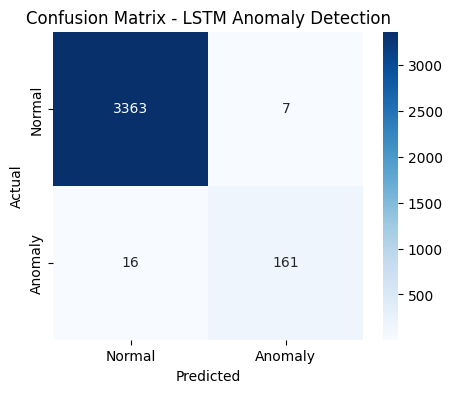

In [ ]:
# =====================================
# 1) Autoencoder sudah dilatih → ambil prediksi & MSE
# =====================================
# Pastikan variabel ini ada:
# - model (autoencoder)
# - X_seq (hasil sliding window, shape: n_seq, timesteps, n_features)
# - batch_size (misal 32)

X_pred = model.predict(X_seq, batch_size=batch_size)

# Hitung MSE per sequence
mse_per_seq = np.mean(np.square(X_seq - X_pred), axis=(1,2))
print("mse_per_seq shape:", mse_per_seq.shape)  # harus sama dengan X_seq.shape[0]

# =====================================
# 2) Tentukan threshold & label sequence
# =====================================
threshold = np.percentile(mse_per_seq, 95)  # contoh: 95th percentile
seq_labels = (mse_per_seq >= threshold).astype(int)

print("X_seq shape:", X_seq.shape)
print("seq_labels shape:", seq_labels.shape)
print("Distribusi label: normal=%d, anomaly=%d" % (
    np.sum(seq_labels==0), np.sum(seq_labels==1)
))

# =====================================
# 3) Split data train/test
# =====================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_seq, seq_labels,
    test_size=0.2, random_state=42,
    stratify=seq_labels
)
print("Train:", X_train.shape, "Test:", X_test.shape)

# =====================================
# 4) Bangun LSTM Classifier
# =====================================
import tensorflow as tf
from tensorflow.keras import layers, models

def build_lstm_classifier(timesteps, features, hidden_size=64):
    model = models.Sequential([
        layers.Input(shape=(timesteps, features)),
        layers.LSTM(hidden_size, return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(hidden_size),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

timesteps, features = X_seq.shape[1], X_seq.shape[2]
clf = build_lstm_classifier(timesteps, features, hidden_size=64)
clf.summary()

# =====================================
# 5) Training LSTM Classifier
# =====================================
history = clf.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    shuffle=True
)

# =====================================
# 6) Plot Loss & Accuracy
# =====================================
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.title('LSTM Training Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('LSTM Training Accuracy')
plt.legend()

plt.show()

# =====================================
# 7) Evaluasi Model
# =====================================
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = (clf.predict(X_test) > 0.5).astype(int)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Normal","Anomaly"],
            yticklabels=["Normal","Anomaly"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LSTM Anomaly Detection")
plt.show()


Trial 10 Complete [00h 11m 31s]
val_accuracy: 0.9850577712059021

Best val_accuracy So Far: 0.9915421605110168
Total elapsed time: 01h 14m 15s
Best hyperparameters:
Units1: 32
Units2: 64
Dropout1: 0.5
Dropout2: 0.5
Learning rate: 0.01
Epoch 1/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.9416 - loss: 0.2018 - val_accuracy: 0.9501 - val_loss: 0.1056
Epoch 2/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9501 - loss: 0.1035 - val_accuracy: 0.9501 - val_loss: 0.0921
Epoch 3/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9510 - loss: 0.0942 - val_accuracy: 0.9766 - val_loss: 0.0720
Epoch 4/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.9616 - loss: 0.0847 - val_accuracy: 0.9543 - val_loss: 0.0743
Epoch 5/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9734 - loss: 0.0588 - val_accuracy: 0.9873 - val_loss: 0.0377
Epoch 6/30
444/444 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.9813 - loss: 0.0478 - val_accuracy: 0.9755 - va

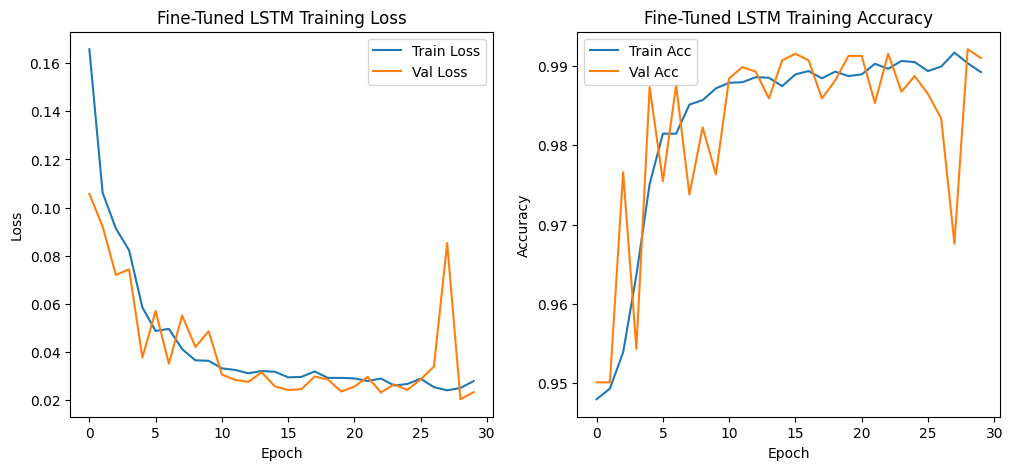

In [ ]:
!pip install keras-tuner --quiet

import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1) Split data
# ---------------------------
X_train, X_val, y_train, y_val = train_test_split(
    X_seq, seq_labels, test_size=0.2, random_state=42, stratify=seq_labels
)

# ---------------------------
# 2) Build model function
# ---------------------------
def build_lstm_model(hp):
    model = keras.Sequential()

    # LSTM layers (tunable units)
    model.add(layers.LSTM(
        units=hp.Int("units1", min_value=32, max_value=128, step=32),
        activation="tanh",
        return_sequences=True,
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))

    model.add(layers.Dropout(hp.Float("dropout1", 0.1, 0.5, step=0.1)))

    model.add(layers.LSTM(
        units=hp.Int("units2", min_value=16, max_value=64, step=16),
        activation="tanh"
    ))

    model.add(layers.Dropout(hp.Float("dropout2", 0.1, 0.5, step=0.1)))

    # Output layer
    model.add(layers.Dense(1, activation="sigmoid"))

    # Optimizer & LR
    lr = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model

# ---------------------------
# 3) Tuner setup
# ---------------------------
tuner = kt.RandomSearch(
    build_lstm_model,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory="tuner_lstm",
    project_name="lstm_anomaly"
)

# ---------------------------
# 4) Jalankan tuning
# ---------------------------
tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

# ---------------------------
# 5) Ambil model terbaik
# ---------------------------
best_hp = tuner.get_best_hyperparameters(1)[0]
print("Best hyperparameters:")
print("Units1:", best_hp.get("units1"))
print("Units2:", best_hp.get("units2"))
print("Dropout1:", best_hp.get("dropout1"))
print("Dropout2:", best_hp.get("dropout2"))
print("Learning rate:", best_hp.get("learning_rate"))

# Bangun ulang model dengan HP terbaik
best_model = tuner.hypermodel.build(best_hp)

# ---------------------------
# 6) Latih ulang model terbaik
# ---------------------------
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32
)

# ---------------------------
# 7) Plot hasil training
# ---------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Fine-Tuned LSTM Training Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Fine-Tuned LSTM Training Accuracy")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.legend()
plt.show()


Epoch 1/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0529 - val_loss: 0.0078
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0076 - val_loss: 0.0060
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0051 - val_loss: 0.0036
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 9/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 10/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 11/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 12/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Rata-rata MSE Train: 0.0018710564739555045
Rata-rata MSE Test : 0.0019027037332861123


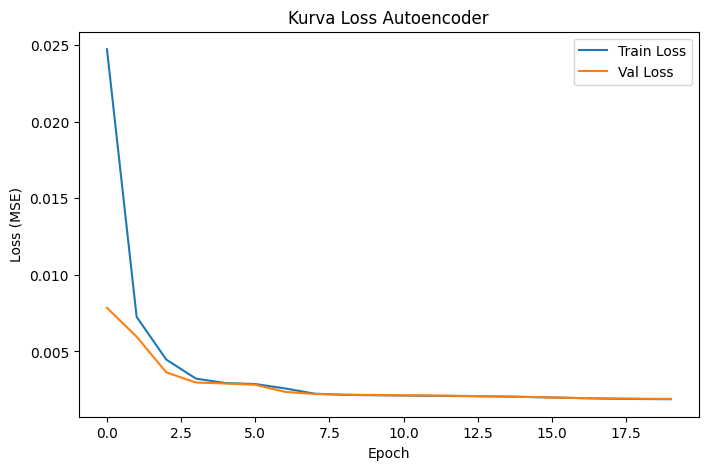

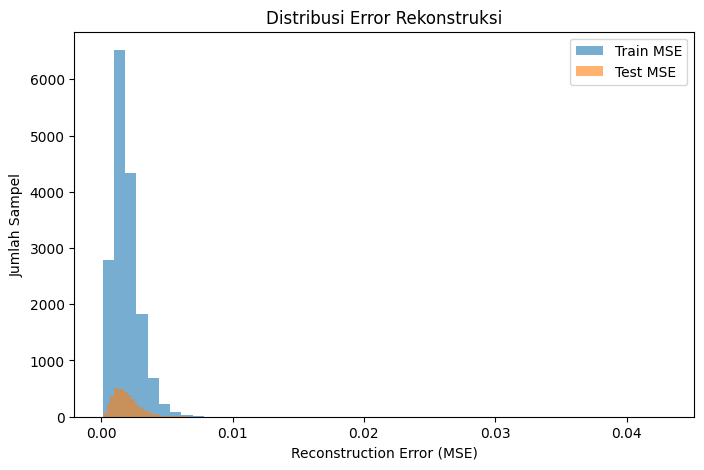

In [ ]:
# =====================================
# AUTOENCODER: Training + Evaluasi
# =====================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# === 1. Load dataset (contoh FD001 CMAPSS) ===
df = pd.read_csv("train_FD001.csv", sep=" ", header=None)
df.dropna(axis=1, inplace=True)  # hapus kolom kosong

# Tambahkan nama kolom (2 identitas + 21 sensor)
col_names = ["unit", "cycle"] + [f"sensor{i}" for i in range(1, df.shape[1]-1)]
df.columns = col_names

# Pilih hanya sensor (fitur numerik yang dipakai model)
sensor_cols = [f"sensor{i}" for i in range(1, 22)]
sensor_data = df[sensor_cols].values

# === 2. Normalisasi data ===
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(sensor_data)

# === 3. Split data train & test ===
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

# === 4. Bangun Autoencoder ===
input_dim = X_train.shape[1]  # jumlah sensor

autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(input_dim, activation="sigmoid")  # output rekonstruksi
])

autoencoder.compile(optimizer="adam", loss="mse")

# === 5. Train model ===
history = autoencoder.fit(
    X_train, X_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, X_test),
    verbose=1
)

# === 6. Simpan model ===
autoencoder.save("autoencoder_model.h5")

# === 7. Evaluasi model ===
X_train_pred = autoencoder.predict(X_train)
X_test_pred  = autoencoder.predict(X_test)

# Hitung MSE (reconstruction error)
train_mse = np.mean(np.power(X_train - X_train_pred, 2), axis=1)
test_mse  = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

print("Rata-rata MSE Train:", np.mean(train_mse))
print("Rata-rata MSE Test :", np.mean(test_mse))

# === 8. Visualisasi Loss Training ===
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Kurva Loss Autoencoder")
plt.show()

# === 9. Visualisasi Distribusi Error ===
plt.figure(figsize=(8,5))
plt.hist(train_mse, bins=50, alpha=0.6, label="Train MSE")
plt.hist(test_mse, bins=50, alpha=0.6, label="Test MSE")
plt.xlabel("Reconstruction Error (MSE)")
plt.ylabel("Jumlah Sampel")
plt.legend()
plt.title("Distribusi Error Rekonstruksi")
plt.show()


In [ ]:
# === Build Autoencoder dengan Input sesuai fitur ===
def build_autoencoder(input_dim, hidden_dim=32, dropout_rate=0.2, lr=0.001):
    model = Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),   # 🔹 Input eksplisit
        Dense(hidden_dim, activation='relu'),
        Dropout(dropout_rate),
        Dense(input_dim, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse')
    return model

# === Training Autoencoder ===
# Gunakan data 2D (samples, features), bukan reshape panjang
X_train_ae = X_train.reshape(X_train.shape[0], -1)  # flatten
X_test_ae  = X_test.reshape(X_test.shape[0], -1)

model = build_autoencoder(X_train_ae.shape[1], hidden_dim=32, dropout_rate=0.2, lr=0.001)

history = model.fit(X_train_ae, X_train_ae,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.1,
                    verbose=1)


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0441 - val_loss: 0.0073
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0084 - val_loss: 0.0072
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0079 - val_loss: 0.0070
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0077 - val_loss: 0.0069
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0076 - val_loss: 0.0068
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0075 - val_loss: 0.0068
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0075 - val_loss: 0.0067
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0074 - val_loss: 0.0067
Epoch 9/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0074 - val_loss: 0.0067
Epoch 10/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0074 - val_loss: 0.0067
Epoch 11/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - val_loss: 0.0067
Epoch 12/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/s

Data Autoencoder: (16480, 720) (4121, 720)
Data LSTM: (16480, 30, 24) (4121, 30, 24)
🔹 Autoencoder Uji-1
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


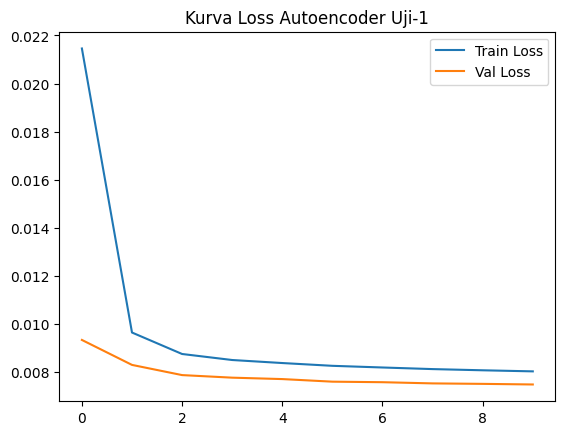

🔹 Autoencoder Uji-2
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
🔹 Autoencoder Uji-3
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
🔹 Autoencoder Uji-4
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
🔹 Autoencoder Uji-5
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
🔹 LSTM Uji-1


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


515/515 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


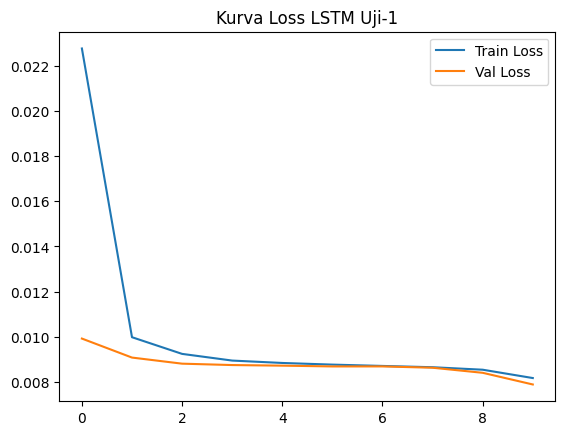

🔹 LSTM Uji-2
515/515 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
🔹 LSTM Uji-3
515/515 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step
🔹 LSTM Uji-4
515/515 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
🔹 LSTM Uji-5
515/515 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step

=== HASIL EVALUASI ===
        Model                                                                                 Params  Train MSE  Test MSE  Threshold
Autoencoder-1   {'hidden_dim': 32, 'dropout_rate': 0.2, 'lr': 0.001, 'epochs': 10, 'batch_size': 64}   0.007281  0.006891   0.029985
Autoencoder-2   {'hidden_dim': 64, 'dropout_rate': 0.3, 'lr': 0.001, 'epochs': 20, 'batch_size': 32}   0.006562  0.006239   0.027739
Autoencoder-3 {'hidden_dim': 128, 'dropout_rate': 0.2, 'lr': 0.0005, 'epochs': 30, 'batch_size': 64}   0.004774  0.004553   0.020381
Autoencoder-4  {'hidden_dim': 64, 'dropout_rate': 0.4, '

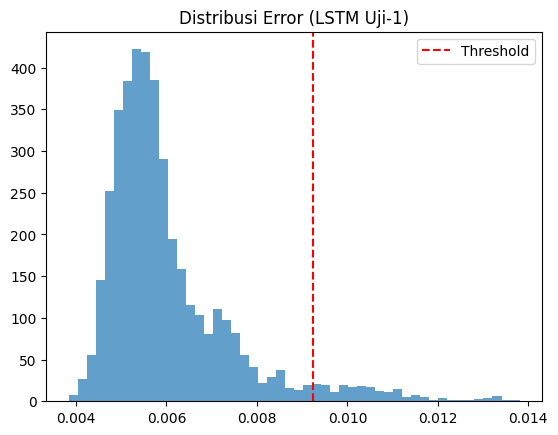

In [ ]:
# === IMPORT LIBRARY ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout, LSTM, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam

# === 1. LOAD & PREPROCESS DATA ===
df = pd.read_csv("train_FD001.csv", sep=" ", header=None)
df.dropna(axis=1, inplace=True)

col_names = ["unit", "cycle"] + [f"sensor{i}" for i in range(1, df.shape[1]-1)]
df.columns = col_names

sensor_cols = [c for c in df.columns if "sensor" in c]
scaler = MinMaxScaler()
df[sensor_cols] = scaler.fit_transform(df[sensor_cols])

# Bentuk sequence utk LSTM
SEQ_LEN = 30
def create_sequences(data, seq_len=SEQ_LEN):
    seqs = []
    for i in range(len(data) - seq_len):
        seqs.append(data[i:i+seq_len])
    return np.array(seqs)

X = df[sensor_cols].values
X_seq = create_sequences(X)

# Split train/test
split = int(len(X_seq)*0.8)
X_train, X_test = X_seq[:split], X_seq[split:]

# Flatten utk Autoencoder
X_train_f = X_train.reshape(len(X_train), -1)
X_test_f  = X_test.reshape(len(X_test), -1)

print("Data Autoencoder:", X_train_f.shape, X_test_f.shape)
print("Data LSTM:", X_train.shape, X_test.shape)

# === 2. BANGUN MODEL ===
def build_autoencoder(input_dim, hidden_dim=64, dropout_rate=0.2, lr=0.001):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(hidden_dim, activation="relu"),
        Dropout(dropout_rate),
        Dense(input_dim, activation="sigmoid")
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss="mse")
    return model

def build_lstm(input_shape, units=64, dropout_rate=0.2, lr=0.001):
    model = Sequential([
        LSTM(units, input_shape=input_shape, return_sequences=False),
        Dropout(dropout_rate),
        RepeatVector(input_shape[0]),
        LSTM(units, return_sequences=True),
        TimeDistributed(Dense(input_shape[1]))
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss="mse")
    return model

# === 3. PARAMETER UJI ===
# === 3. PARAMETER UJI ===
auto_tests = [
    {"hidden_dim":32,"dropout_rate":0.2,"lr":0.001,"epochs":10,"batch_size":64},
    {"hidden_dim":64,"dropout_rate":0.3,"lr":0.001,"epochs":20,"batch_size":32},
    {"hidden_dim":128,"dropout_rate":0.2,"lr":0.0005,"epochs":30,"batch_size":64},
    {"hidden_dim":64,"dropout_rate":0.4,"lr":0.001,"epochs":40,"batch_size":128},
    {"hidden_dim":32,"dropout_rate":0.1,"lr":0.002,"epochs":50,"batch_size":32},
]

lstm_tests = [
    {"units":32,"dropout_rate":0.2,"lr":0.001,"epochs":10,"batch_size":64},
    {"units":64,"dropout_rate":0.3,"lr":0.001,"epochs":20,"batch_size":32},
    {"units":128,"dropout_rate":0.2,"lr":0.0005,"epochs":30,"batch_size":64},
    {"units":64,"dropout_rate":0.4,"lr":0.001,"epochs":40,"batch_size":128},
    {"units":32,"dropout_rate":0.1,"lr":0.002,"epochs":50,"batch_size":32},
]

# === 4. EVALUASI AUTOENCODER ===
auto_results = []
for i, params in enumerate(auto_tests,1):
    print(f"🔹 Autoencoder Uji-{i}")
    model = build_autoencoder(X_train_f.shape[1],
                              hidden_dim=params["hidden_dim"],
                              dropout_rate=params["dropout_rate"],
                              lr=params["lr"])
    hist = model.fit(X_train_f, X_train_f,
                     epochs=params["epochs"], batch_size=params["batch_size"],
                     verbose=0, validation_split=0.1)

    train_pred = model.predict(X_train_f)
    test_pred  = model.predict(X_test_f)
    train_mse  = np.mean(np.square(X_train_f - train_pred))
    test_mse   = np.mean(np.square(X_test_f - test_pred))
    threshold  = np.percentile(np.square(X_train_f - train_pred), 95)

    auto_results.append({
        "Model": f"Autoencoder-{i}",
        "Params": params,
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Threshold": threshold
    })

    if i==1:
        plt.plot(hist.history['loss'], label="Train Loss")
        plt.plot(hist.history['val_loss'], label="Val Loss")
        plt.title("Kurva Loss Autoencoder Uji-1")
        plt.legend()
        plt.show()

# === 5. EVALUASI LSTM ===
lstm_results = []
for i, params in enumerate(lstm_tests,1):
    print(f"🔹 LSTM Uji-{i}")
    model = build_lstm((X_train.shape[1], X_train.shape[2]),
                       units=params["units"],
                       dropout_rate=params["dropout_rate"],
                       lr=params["lr"])
    hist = model.fit(X_train, X_train,
                     epochs=params["epochs"], batch_size=params["batch_size"],
                     verbose=0, validation_split=0.1)

    train_pred = model.predict(X_train)
    test_pred  = model.predict(X_test)
    train_mse  = np.mean(np.mean(np.square(X_train - train_pred), axis=(1,2)))
    test_mse   = np.mean(np.mean(np.square(X_test - test_pred), axis=(1,2)))
    threshold  = np.percentile(train_mse, 95)

    lstm_results.append({
        "Model": f"LSTM-{i}",
        "Params": params,
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Threshold": threshold
    })

    if i==1:
        plt.plot(hist.history['loss'], label="Train Loss")
        plt.plot(hist.history['val_loss'], label="Val Loss")
        plt.title("Kurva Loss LSTM Uji-1")
        plt.legend()
        plt.show()

# === 6. HASIL AKHIR ===
df_results = pd.DataFrame(auto_results + lstm_results)
print("\n=== HASIL EVALUASI ===")
print(df_results.to_string(index=False))

# === 7. HISTOGRAM ERROR (contoh dari LSTM uji-1) ===
errors = np.mean(np.square(X_test - test_pred), axis=(1,2))
plt.hist(errors, bins=50, alpha=0.7)
plt.axvline(x=np.percentile(errors,95), color='r', linestyle='--', label='Threshold')
plt.title("Distribusi Error (LSTM Uji-1)")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, RepeatVector, TimeDistributed, Input
from tensorflow.keras.optimizers import Adam

# === Build Models ===
def build_autoencoder(input_dim, hidden_dim=32, dropout_rate=0.2, lr=0.001):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(hidden_dim, activation="relu"),
        Dropout(dropout_rate),
        Dense(input_dim, activation="sigmoid")
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss="mse")
    return model

def build_lstm_autoencoder(timesteps, features, units=32, dropout_rate=0.2, lr=0.001):
    model = Sequential([
        Input(shape=(timesteps, features)),

        # Encoder
        LSTM(units, activation="tanh", return_sequences=False),
        Dropout(dropout_rate),

        # Decoder
        RepeatVector(timesteps),
        LSTM(units, activation="tanh", return_sequences=True),
        Dropout(dropout_rate),

        # Output
        TimeDistributed(Dense(features))
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss="mse")
    return model

# === Hyperparameter Tests ===
auto_tests = [
    {"hidden_dim": 16, "dropout_rate": 0.1, "lr": 0.001, "epochs": 10, "batch_size": 32},
    {"hidden_dim": 32, "dropout_rate": 0.2, "lr": 0.001, "epochs": 20, "batch_size": 64},
    {"hidden_dim": 64, "dropout_rate": 0.3, "lr": 0.002, "epochs": 30, "batch_size": 64},
    {"hidden_dim": 128, "dropout_rate": 0.2, "lr": 0.001, "epochs": 40, "batch_size": 128},
    {"hidden_dim": 256, "dropout_rate": 0.3, "lr": 0.0005, "epochs": 50, "batch_size": 64},
]

lstm_tests = [
    {"units": 16, "dropout_rate": 0.1, "lr": 0.001, "epochs": 10, "batch_size": 32},
    {"units": 32, "dropout_rate": 0.2, "lr": 0.001, "epochs": 20, "batch_size": 64},
    {"units": 64, "dropout_rate": 0.3, "lr": 0.002, "epochs": 30, "batch_size": 64},
    {"units": 128, "dropout_rate": 0.2, "lr": 0.001, "epochs": 40, "batch_size": 128},
    {"units": 256, "dropout_rate": 0.3, "lr": 0.0005, "epochs": 50, "batch_size": 64},
]

# === Dummy Data (ganti dengan data preprocessing lu) ===
# Misalnya hasil preprocessing: X_train, X_test
timesteps, features = 30, 21
X_train = np.random.rand(500, timesteps, features)
X_test = np.random.rand(100, timesteps, features)

# Flatten untuk Autoencoder Dense
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

# === Run Tests ===
results = []

# Autoencoder
for i, params in enumerate(auto_tests, 1):
    print(f"\n🔹 Uji Autoencoder {i} dengan params: {params}")
    model = build_autoencoder(X_train_flat.shape[1], **{k: params[k] for k in ["hidden_dim","dropout_rate","lr"]})
    hist = model.fit(X_train_flat, X_train_flat,
                     epochs=params["epochs"], batch_size=params["batch_size"],
                     verbose=0, validation_split=0.1)
    train_loss = model.evaluate(X_train_flat, X_train_flat, verbose=0)
    test_loss  = model.evaluate(X_test_flat,  X_test_flat, verbose=0)
    results.append(["Autoencoder", i, params, train_loss, test_loss])

# LSTM Autoencoder
for i, params in enumerate(lstm_tests, 1):
    print(f"\n🔹 Uji LSTM {i} dengan params: {params}")
    model = build_lstm_autoencoder(timesteps, features, **{k: params[k] for k in ["units","dropout_rate","lr"]})
    hist = model.fit(X_train, X_train,
                     epochs=params["epochs"], batch_size=params["batch_size"],
                     verbose=0, validation_split=0.1)
    train_loss = model.evaluate(X_train, X_train, verbose=0)
    test_loss  = model.evaluate(X_test,  X_test, verbose=0)
    results.append(["LSTM Autoencoder", i, params, train_loss, test_loss])

# === Ringkasan ke Tabel ===
df_results = pd.DataFrame(results, columns=["Model", "Uji", "Hyperparameters", "Train Loss", "Test Loss"])
print("\n=== Hasil Evaluasi ===")
print(df_results)

# Simpan ke Excel
df_results.to_excel("hasil_evaluasi.xlsx", index=False)



🔹 Uji Autoencoder 1 dengan params: {'hidden_dim': 16, 'dropout_rate': 0.1, 'lr': 0.001, 'epochs': 10, 'batch_size': 32}

🔹 Uji Autoencoder 2 dengan params: {'hidden_dim': 32, 'dropout_rate': 0.2, 'lr': 0.001, 'epochs': 20, 'batch_size': 64}

🔹 Uji Autoencoder 3 dengan params: {'hidden_dim': 64, 'dropout_rate': 0.3, 'lr': 0.002, 'epochs': 30, 'batch_size': 64}

🔹 Uji Autoencoder 4 dengan params: {'hidden_dim': 128, 'dropout_rate': 0.2, 'lr': 0.001, 'epochs': 40, 'batch_size': 128}

🔹 Uji Autoencoder 5 dengan params: {'hidden_dim': 256, 'dropout_rate': 0.3, 'lr': 0.0005, 'epochs': 50, 'batch_size': 64}

🔹 Uji LSTM 1 dengan params: {'units': 16, 'dropout_rate': 0.1, 'lr': 0.001, 'epochs': 10, 'batch_size': 32}

🔹 Uji LSTM 2 dengan params: {'units': 32, 'dropout_rate': 0.2, 'lr': 0.001, 'epochs': 20, 'batch_size': 64}

🔹 Uji LSTM 3 dengan params: {'units': 64, 'dropout_rate': 0.3, 'lr': 0.002, 'epochs': 30, 'batch_size': 64}

🔹 Uji LSTM 4 dengan params: {'units': 128, 'dropout_rate': 0.2,


🔹 Uji Autoencoder 1 dengan params: {'hidden_dim': 16, 'dropout_rate': 0.1, 'lr': 0.001, 'epochs': 10, 'batch_size': 32}
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


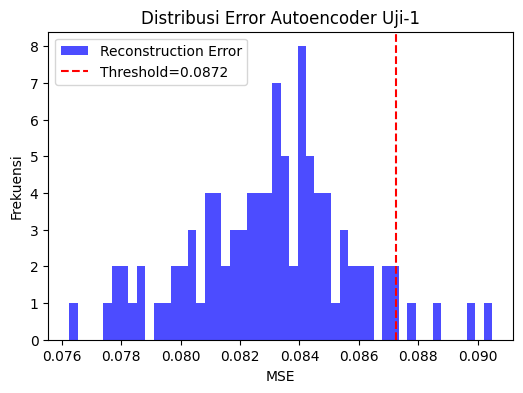

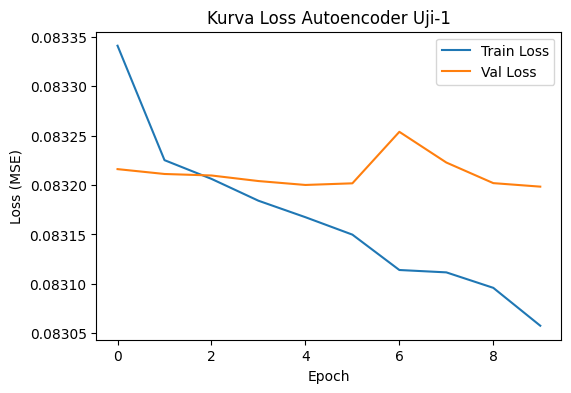


🔹 Uji Autoencoder 2 dengan params: {'hidden_dim': 32, 'dropout_rate': 0.2, 'lr': 0.001, 'epochs': 20, 'batch_size': 64}
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


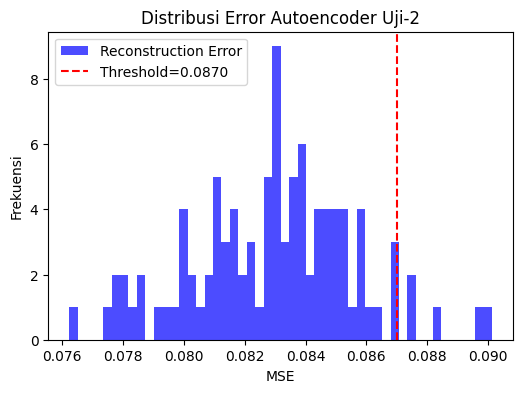

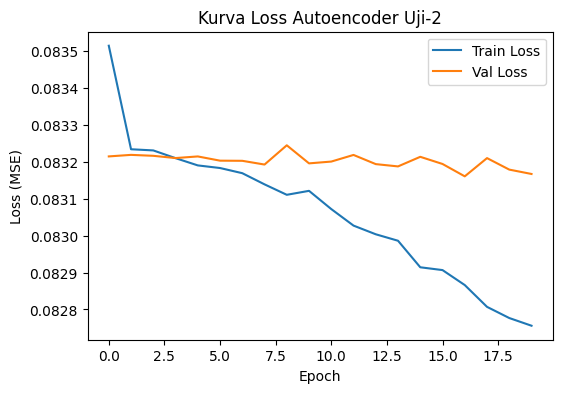


🔹 Uji Autoencoder 3 dengan params: {'hidden_dim': 64, 'dropout_rate': 0.3, 'lr': 0.002, 'epochs': 30, 'batch_size': 64}


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


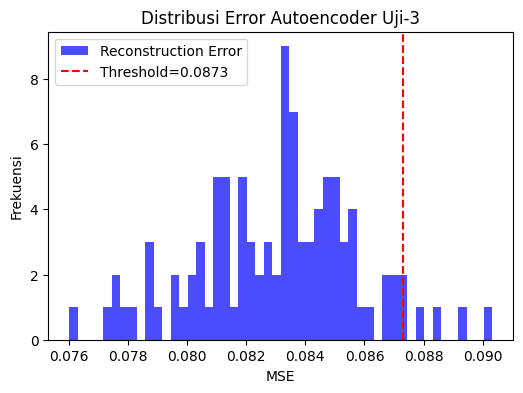

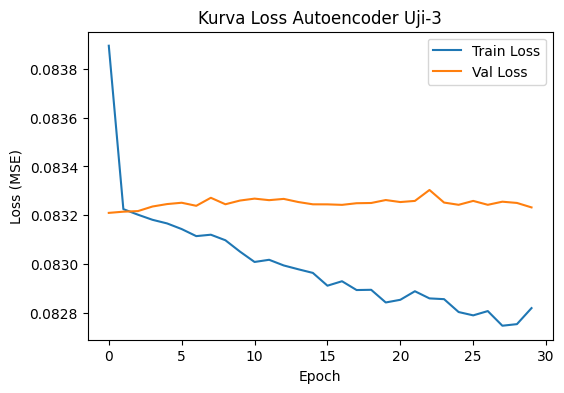


🔹 Uji Autoencoder 4 dengan params: {'hidden_dim': 128, 'dropout_rate': 0.2, 'lr': 0.001, 'epochs': 40, 'batch_size': 128}
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


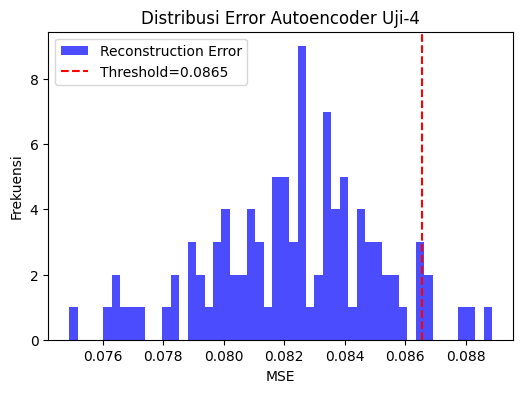

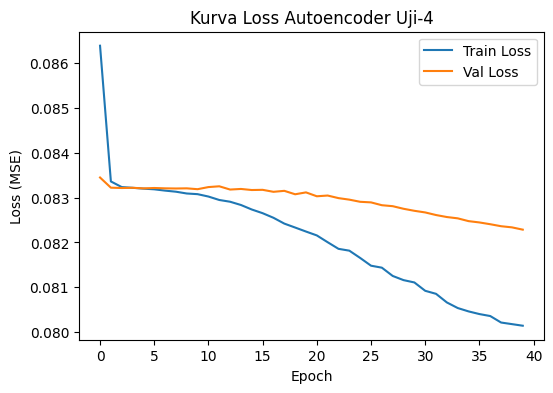


🔹 Uji Autoencoder 5 dengan params: {'hidden_dim': 256, 'dropout_rate': 0.3, 'lr': 0.0005, 'epochs': 50, 'batch_size': 64}
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


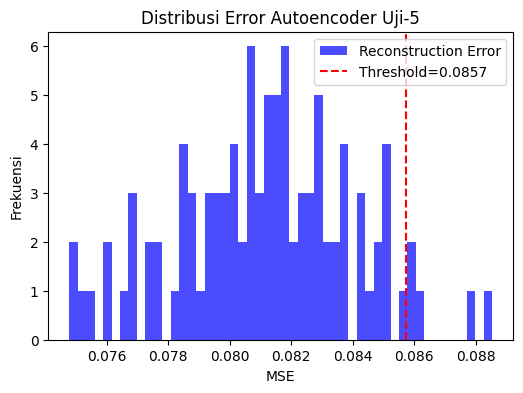

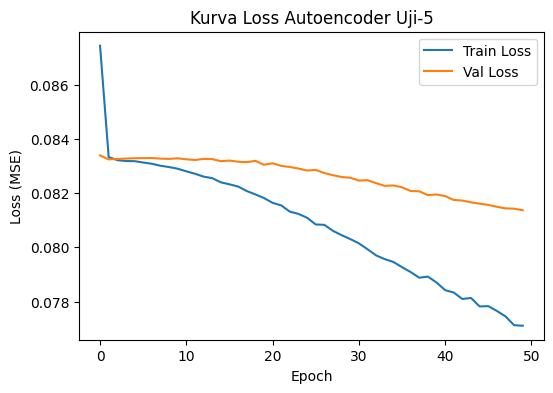


🔹 Uji LSTM 1 dengan params: {'units': 16, 'dropout_rate': 0.1, 'lr': 0.001, 'epochs': 10, 'batch_size': 32}
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step


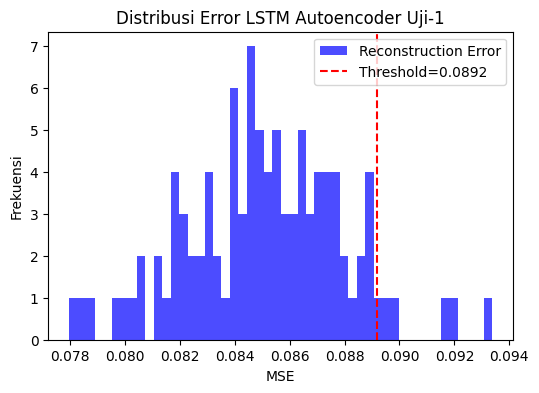

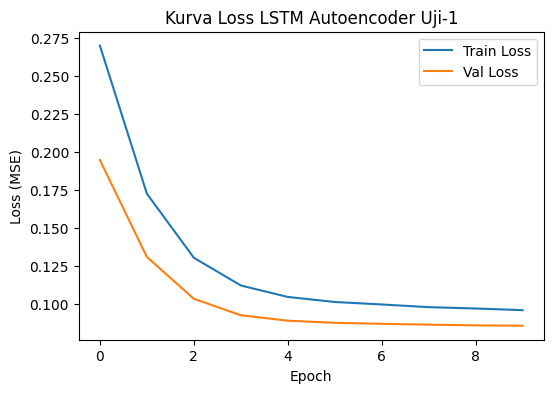


🔹 Uji LSTM 2 dengan params: {'units': 32, 'dropout_rate': 0.2, 'lr': 0.001, 'epochs': 20, 'batch_size': 64}
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 365ms/step


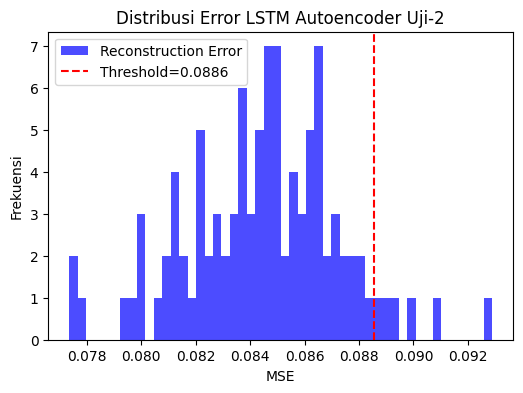

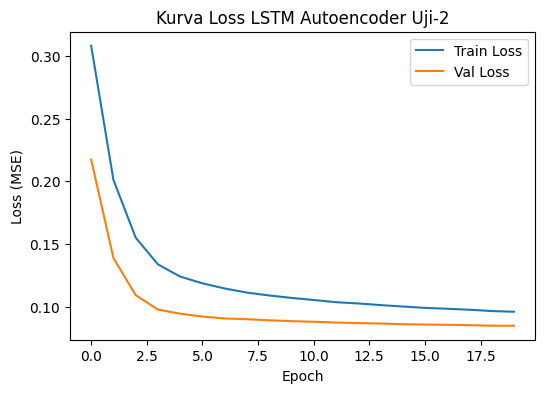


🔹 Uji LSTM 3 dengan params: {'units': 64, 'dropout_rate': 0.3, 'lr': 0.002, 'epochs': 30, 'batch_size': 64}
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step


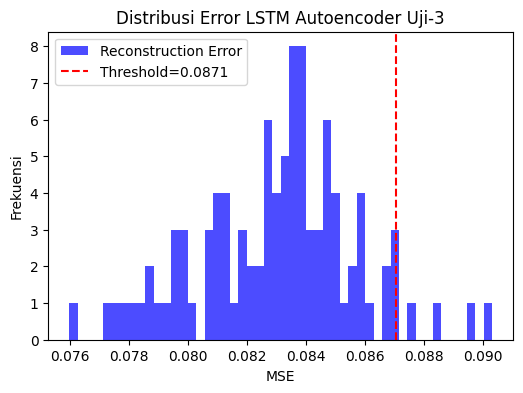

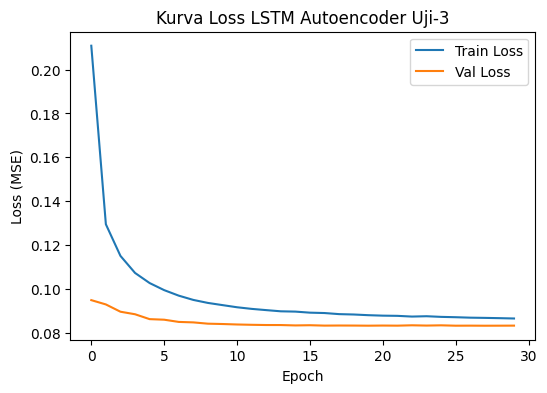


🔹 Uji LSTM 4 dengan params: {'units': 128, 'dropout_rate': 0.2, 'lr': 0.001, 'epochs': 40, 'batch_size': 128}
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step


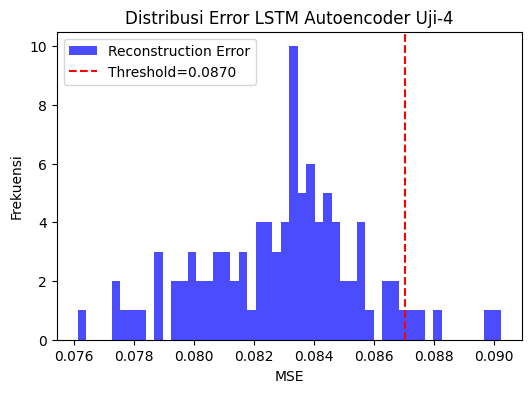

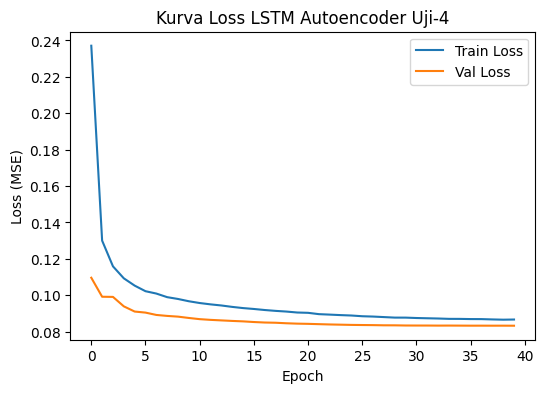


🔹 Uji LSTM 5 dengan params: {'units': 256, 'dropout_rate': 0.3, 'lr': 0.0005, 'epochs': 50, 'batch_size': 64}
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 294ms/step


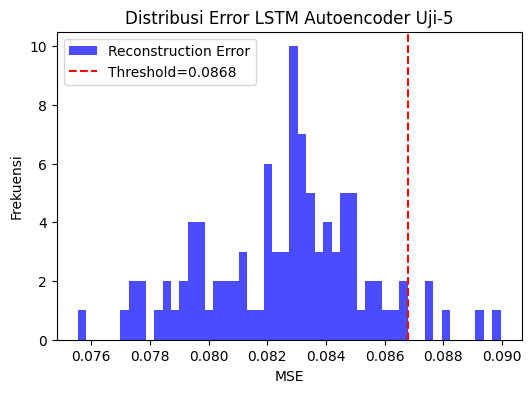

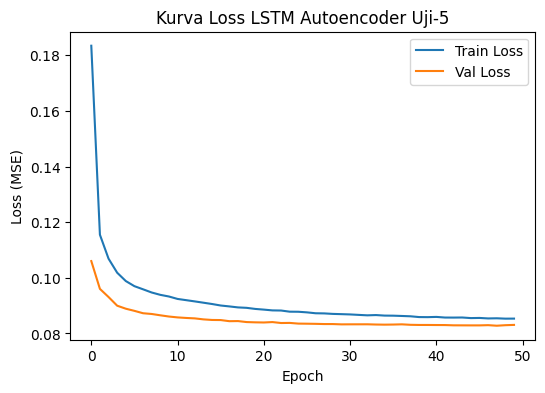


=== Hasil Evaluasi ===
              Model  Uji                                    Hyperparameters  \
0       Autoencoder    1  {'hidden_dim': 16, 'dropout_rate': 0.1, 'lr': ...   
1       Autoencoder    2  {'hidden_dim': 32, 'dropout_rate': 0.2, 'lr': ...   
2       Autoencoder    3  {'hidden_dim': 64, 'dropout_rate': 0.3, 'lr': ...   
3       Autoencoder    4  {'hidden_dim': 128, 'dropout_rate': 0.2, 'lr':...   
4       Autoencoder    5  {'hidden_dim': 256, 'dropout_rate': 0.3, 'lr':...   
5  LSTM Autoencoder    1  {'units': 16, 'dropout_rate': 0.1, 'lr': 0.001...   
6  LSTM Autoencoder    2  {'units': 32, 'dropout_rate': 0.2, 'lr': 0.001...   
7  LSTM Autoencoder    3  {'units': 64, 'dropout_rate': 0.3, 'lr': 0.002...   
8  LSTM Autoencoder    4  {'units': 128, 'dropout_rate': 0.2, 'lr': 0.00...   
9  LSTM Autoencoder    5  {'units': 256, 'dropout_rate': 0.3, 'lr': 0.00...   

   Train Loss  Test Loss  Threshold  
0    0.083046   0.083000   0.087245  
1    0.082732   0.082953   0.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, RepeatVector, TimeDistributed, Input
from tensorflow.keras.optimizers import Adam

# === Build Models ===
def build_autoencoder(input_dim, hidden_dim=32, dropout_rate=0.2, lr=0.001):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(hidden_dim, activation="relu"),
        Dropout(dropout_rate),
        Dense(input_dim, activation="sigmoid")
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss="mse")
    return model

def build_lstm_autoencoder(timesteps, features, units=32, dropout_rate=0.2, lr=0.001):
    model = Sequential([
        Input(shape=(timesteps, features)),
        LSTM(units, activation="tanh", return_sequences=False),
        Dropout(dropout_rate),
        RepeatVector(timesteps),
        LSTM(units, activation="tanh", return_sequences=True),
        Dropout(dropout_rate),
        TimeDistributed(Dense(features))
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss="mse")
    return model

# === Hyperparameter Tests ===
auto_tests = [
    {"hidden_dim": 16, "dropout_rate": 0.1, "lr": 0.001, "epochs": 10, "batch_size": 32},
    {"hidden_dim": 32, "dropout_rate": 0.2, "lr": 0.001, "epochs": 20, "batch_size": 64},
    {"hidden_dim": 64, "dropout_rate": 0.3, "lr": 0.002, "epochs": 30, "batch_size": 64},
    {"hidden_dim": 128, "dropout_rate": 0.2, "lr": 0.001, "epochs": 40, "batch_size": 128},
    {"hidden_dim": 256, "dropout_rate": 0.3, "lr": 0.0005, "epochs": 50, "batch_size": 64},
]

lstm_tests = [
    {"units": 16, "dropout_rate": 0.1, "lr": 0.001, "epochs": 10, "batch_size": 32},
    {"units": 32, "dropout_rate": 0.2, "lr": 0.001, "epochs": 20, "batch_size": 64},
    {"units": 64, "dropout_rate": 0.3, "lr": 0.002, "epochs": 30, "batch_size": 64},
    {"units": 128, "dropout_rate": 0.2, "lr": 0.001, "epochs": 40, "batch_size": 128},
    {"units": 256, "dropout_rate": 0.3, "lr": 0.0005, "epochs": 50, "batch_size": 64},
]

# === Dummy Data (ganti dengan data preprocessing lu) ===
timesteps, features = 30, 21
X_train = np.random.rand(500, timesteps, features)
X_test = np.random.rand(100, timesteps, features)

# Flatten untuk Autoencoder Dense
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

# === Run Tests ===
results = []

def plot_loss(hist, model_name, i):
    plt.figure(figsize=(6,4))
    plt.plot(hist.history["loss"], label="Train Loss")
    plt.plot(hist.history["val_loss"], label="Val Loss")
    plt.title(f"Kurva Loss {model_name} Uji-{i}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.show()

def plot_histogram(model, X, model_name, i):
    preds = model.predict(X)
    if len(preds.shape) == 3:  # LSTM (sequence)
        mse = np.mean(np.mean(np.square(X - preds), axis=2), axis=1)
    else:  # Dense Autoencoder
        mse = np.mean(np.square(X - preds), axis=1)

    threshold = np.percentile(mse, 95)  # threshold 95th percentile

    plt.figure(figsize=(6,4))
    plt.hist(mse, bins=50, alpha=0.7, color="blue", label="Reconstruction Error")
    plt.axvline(threshold, color="red", linestyle="--", label=f"Threshold={threshold:.4f}")
    plt.title(f"Distribusi Error {model_name} Uji-{i}")
    plt.xlabel("MSE")
    plt.ylabel("Frekuensi")
    plt.legend()
    plt.show()

    return threshold

# Autoencoder
for i, params in enumerate(auto_tests, 1):
    print(f"\n🔹 Uji Autoencoder {i} dengan params: {params}")
    model = build_autoencoder(X_train_flat.shape[1], **{k: params[k] for k in ["hidden_dim","dropout_rate","lr"]})
    hist = model.fit(X_train_flat, X_train_flat,
                     epochs=params["epochs"], batch_size=params["batch_size"],
                     verbose=0, validation_split=0.1)
    train_loss = model.evaluate(X_train_flat, X_train_flat, verbose=0)
    test_loss  = model.evaluate(X_test_flat,  X_test_flat, verbose=0)
    threshold = plot_histogram(model, X_test_flat, "Autoencoder", i)
    plot_loss(hist, "Autoencoder", i)
    results.append(["Autoencoder", i, params, train_loss, test_loss, threshold])

# LSTM Autoencoder
for i, params in enumerate(lstm_tests, 1):
    print(f"\n🔹 Uji LSTM {i} dengan params: {params}")
    model = build_lstm_autoencoder(timesteps, features, **{k: params[k] for k in ["units","dropout_rate","lr"]})
    hist = model.fit(X_train, X_train,
                     epochs=params["epochs"], batch_size=params["batch_size"],
                     verbose=0, validation_split=0.1)
    train_loss = model.evaluate(X_train, X_train, verbose=0)
    test_loss  = model.evaluate(X_test,  X_test, verbose=0)
    threshold = plot_histogram(model, X_test, "LSTM Autoencoder", i)
    plot_loss(hist, "LSTM Autoencoder", i)
    results.append(["LSTM Autoencoder", i, params, train_loss, test_loss, threshold])

# === Ringkasan ke Tabel ===
df_results = pd.DataFrame(results, columns=["Model", "Uji", "Hyperparameters", "Train Loss", "Test Loss", "Threshold"])
print("\n=== Hasil Evaluasi ===")
print(df_results)

# Simpan ke Excel
df_results.to_excel("hasil_evaluasi.xlsx", index=False)


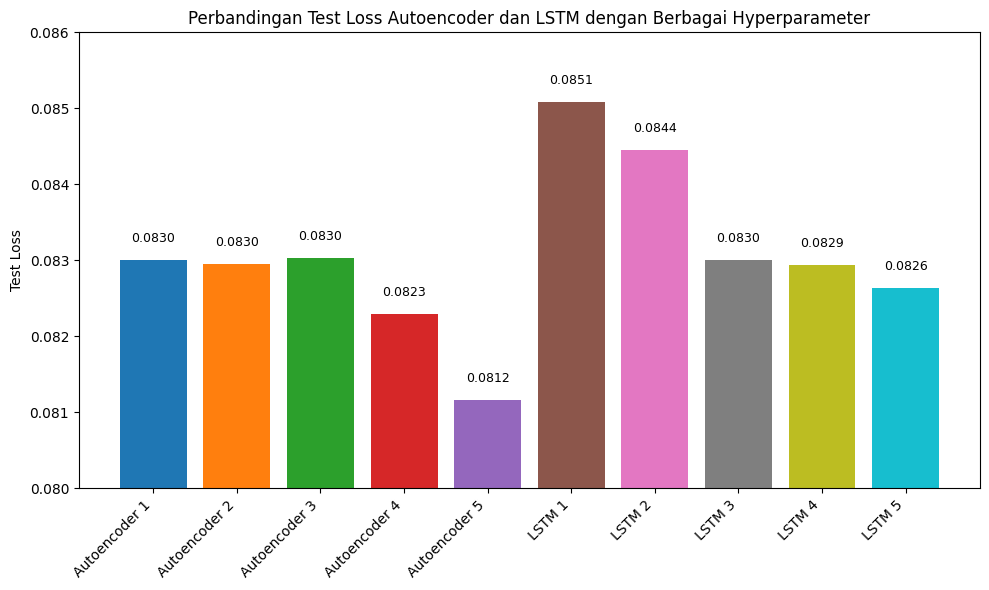

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data dari tabel
data = {
    "Model": ["Autoencoder", "Autoencoder", "Autoencoder", "Autoencoder", "Autoencoder",
              "LSTM", "LSTM", "LSTM", "LSTM", "LSTM"],
    "Uji": [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    "Test Loss": [0.083000, 0.082953, 0.083028, 0.082295, 0.081165,
                  0.085087, 0.084450, 0.083006, 0.082932, 0.082631]
}

df = pd.DataFrame(data)

# Membuat label gabungan "Model Uji"
df["Label"] = df["Model"] + " " + df["Uji"].astype(str)

# Plot bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(df["Label"], df["Test Loss"], color=plt.cm.tab10(np.linspace(0,1,len(df))))

# Tambahkan nilai di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0002, f"{yval:.4f}",
             ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.ylim(0.080, 0.086)  # fokus biar keliatan perbedaan kecil
plt.ylabel("Test Loss")
plt.title("Perbandingan Test Loss Autoencoder dan LSTM dengan Berbagai Hyperparameter")
plt.tight_layout()
plt.show()



🔹 Training Autoencoder


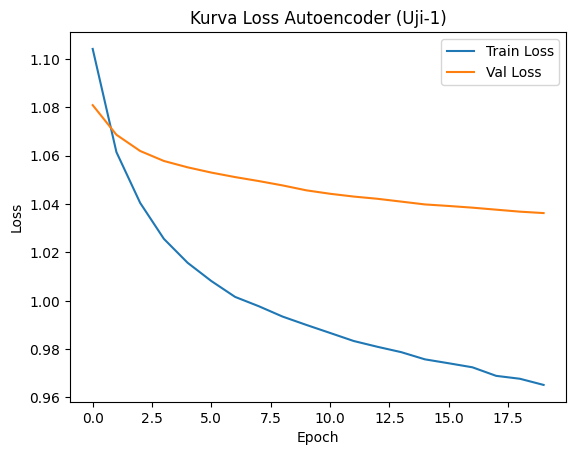

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


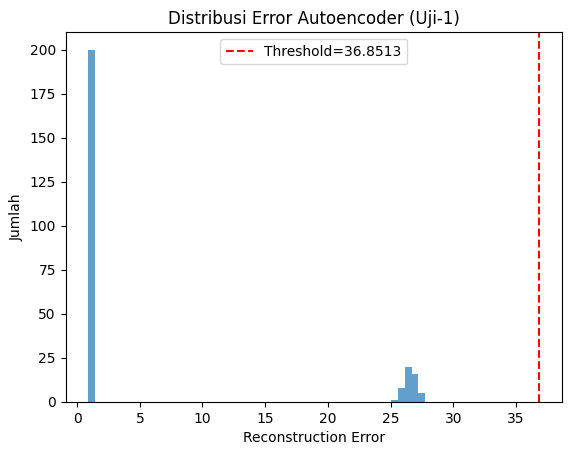

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

📊 Confusion Matrix Autoencoder (Uji-1)
[[200   0]
 [ 50   0]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8000    1.0000    0.8889       200
           1     0.0000    0.0000    0.0000        50

    accuracy                         0.8000       250
   macro avg     0.4000    0.5000    0.4444       250
weighted avg     0.6400    0.8000    0.7111       250


🔹 Training LSTM


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/keras/src

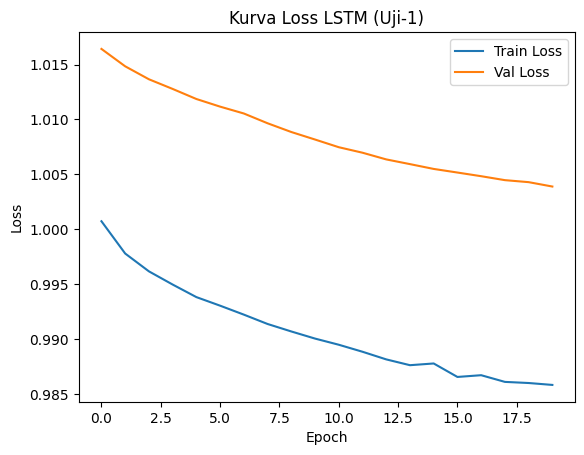

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step


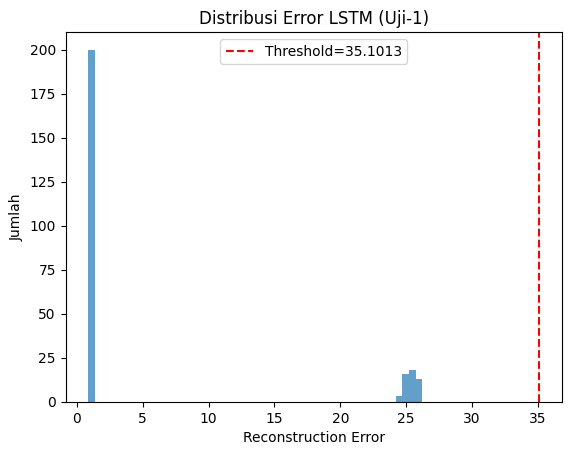

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

📊 Confusion Matrix LSTM (Uji-1)
[[200   0]
 [ 50   0]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8000    1.0000    0.8889       200
           1     0.0000    0.0000    0.0000        50

    accuracy                         0.8000       250
   macro avg     0.4000    0.5000    0.4444       250
weighted avg     0.6400    0.8000    0.7111       250



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, RepeatVector, TimeDistributed, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

# =========================
# 1. Build Model Functions
# =========================
def build_autoencoder(input_dim, hidden_dim=32, dropout_rate=0.2, lr=0.001):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(hidden_dim, activation="relu"),
        Dropout(dropout_rate),
        Dense(input_dim, activation="linear")
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss="mse")
    return model

def build_lstm(input_shape, units=32, dropout_rate=0.2, lr=0.001):
    model = Sequential([
        LSTM(units, input_shape=input_shape, return_sequences=True),
        Dropout(dropout_rate),
        LSTM(units, return_sequences=False),
        RepeatVector(input_shape[0]),
        LSTM(units, return_sequences=True),
        Dropout(dropout_rate),
        TimeDistributed(Dense(input_shape[1]))
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss="mse")
    return model

# =========================
# 2. Plot Functions
# =========================
def plot_loss(history, name, i):
    plt.figure()
    plt.plot(history.history['loss'], label="Train Loss")
    plt.plot(history.history['val_loss'], label="Val Loss")
    plt.title(f"Kurva Loss {name} (Uji-{i})")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

def plot_histogram(model, X, name, i):
    preds = model.predict(X)
    if len(preds.shape) == 3:  # LSTM
        mse = np.mean(np.mean(np.square(X - preds), axis=2), axis=1)
    else:  # Autoencoder
        mse = np.mean(np.square(X - preds), axis=1)

    threshold = np.mean(mse) + 3*np.std(mse)

    plt.figure()
    plt.hist(mse, bins=50, alpha=0.7)
    plt.axvline(threshold, color="r", linestyle="--", label=f"Threshold={threshold:.4f}")
    plt.title(f"Distribusi Error {name} (Uji-{i})")
    plt.xlabel("Reconstruction Error")
    plt.ylabel("Jumlah")
    plt.legend()
    plt.show()

    return threshold

# =========================
# 3. Confusion Matrix Eval
# =========================
def evaluate_confusion_matrix(model, X, threshold, name, i, y_true):
    preds = model.predict(X)
    if len(preds.shape) == 3:  # LSTM
        mse = np.mean(np.mean(np.square(X - preds), axis=2), axis=1)
    else:  # Autoencoder
        mse = np.mean(np.square(X - preds), axis=1)

    y_pred = (mse > threshold).astype(int)

    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, digits=4)

    print(f"\n📊 Confusion Matrix {name} (Uji-{i})")
    print(cm)
    print("\nClassification Report:")
    print(report)

    return cm, report

# =========================
# 4. Contoh Data Dummy
# =========================
# misal X_train normal, X_test campuran normal + anomali
X_train = np.random.normal(0, 1, (500, 30, 21))  # (sample, timestep, feature)
X_test = np.random.normal(0, 1, (200, 30, 21))
X_test_anom = np.random.normal(5, 1, (50, 30, 21))  # data anomali

X_test_full = np.concatenate([X_test, X_test_anom], axis=0)
y_test_labels = np.array([0]*200 + [1]*50)

# untuk Autoencoder → flatten (2D)
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test_full.reshape((X_test_full.shape[0], -1))

# =========================
# 5. Training & Evaluasi
# =========================

# ---- Autoencoder ----
print("\n🔹 Training Autoencoder")
auto_model = build_autoencoder(X_train_flat.shape[1], hidden_dim=32, dropout_rate=0.2, lr=0.001)
hist_auto = auto_model.fit(X_train_flat, X_train_flat,
                           epochs=20, batch_size=64,
                           validation_split=0.1, verbose=0)

plot_loss(hist_auto, "Autoencoder", 1)
th_auto = plot_histogram(auto_model, X_test_flat, "Autoencoder", 1)
cm_auto, rep_auto = evaluate_confusion_matrix(auto_model, X_test_flat, th_auto, "Autoencoder", 1, y_test_labels)

# ---- LSTM ----
print("\n🔹 Training LSTM")
lstm_model = build_lstm((X_train.shape[1], X_train.shape[2]), units=32, dropout_rate=0.2, lr=0.001)
hist_lstm = lstm_model.fit(X_train, X_train,
                           epochs=20, batch_size=64,
                           validation_split=0.1, verbose=0)

plot_loss(hist_lstm, "LSTM", 1)
th_lstm = plot_histogram(lstm_model, X_test_full, "LSTM", 1)
cm_lstm, rep_lstm = evaluate_confusion_matrix(lstm_model, X_test_full, th_lstm, "LSTM", 1, y_test_labels)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# === Fungsi Evaluasi Umum ===
def evaluate_model(model, X_train, X_test, threshold=None, model_name="Model"):
    # Prediksi rekonstruksi
    X_train_pred = model.predict(X_train)
    X_test_pred  = model.predict(X_test)

    # Hitung MSE (reconstruction error)
    train_mse = np.mean(np.power(X_train - X_train_pred, 2), axis=1)
    test_mse  = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

    # Jika threshold tidak ditentukan, pakai mean + 3*std
    if threshold is None:
        threshold = np.mean(train_mse) + 3*np.std(train_mse)

    # Klasifikasi normal/anomali berdasarkan threshold
    y_train_pred = (train_mse > threshold).astype(int)
    y_test_pred  = (test_mse > threshold).astype(int)

    # (Optional) jika ada label ground truth, bisa bandingkan di sini
    # y_train_true = ...
    # y_test_true = ...

    # Ringkasan hasil
    results = {
        "Model": model_name,
        "Train MSE": np.mean(train_mse),
        "Test MSE": np.mean(test_mse),
        "Threshold": threshold,
        "FP/FN": "Jika ada label, bisa dihitung confusion matrix"
    }
    return results

# === Evaluasi Autoencoder ===
autoencoder_results = evaluate_model(autoencoder, X_train, X_test, model_name="Autoencoder")

# Kalau ada LSTM atau model lain, ulangi:
# lstm_results = evaluate_model(lstm, X_train, X_test, model_name="LSTM")

# === Simpan ke Tabel ===
all_results = pd.DataFrame([autoencoder_results]) # tambah lstm_results kalau ada
print(all_results)
all_results.to_csv("Evaluasi_Model.csv", index=False)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
         Model  Train MSE  Test MSE  Threshold  \
0  Autoencoder   0.001871  0.001903   0.005374   

                                            FP/FN  
0  Jika ada label, bisa dihitung confusion matrix  


🔹 Data awal:
   unit  cycle  sensor1  sensor2  sensor3  sensor4  sensor5  sensor6  sensor7  \
0     1      1  -0.0007  -0.0004    100.0   518.67   641.82  1589.70  1400.60   
1     1      2   0.0019  -0.0003    100.0   518.67   642.15  1591.82  1403.14   
2     1      3  -0.0043   0.0003    100.0   518.67   642.35  1587.99  1404.20   
3     1      4   0.0007   0.0000    100.0   518.67   642.35  1582.79  1401.87   
4     1      5  -0.0019  -0.0002    100.0   518.67   642.37  1582.85  1406.22   

   sensor8  sensor9  sensor10  sensor11  sensor12  sensor13  sensor14  \
0    14.62    21.61    554.36   2388.06   9046.19       1.3     47.47   
1    14.62    21.61    553.75   2388.04   9044.07       1.3     47.49   
2    14.62    21.61    554.26   2388.08   9052.94       1.3     47.27   
3    14.62    21.61    554.45   2388.11   9049.48       1.3     47.13   
4    14.62    21.61    554.00   2388.06   9055.15       1.3     47.28   

   sensor15  sensor16  sensor17  sensor18  sensor19  sensor20

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0698 - val_loss: 0.0136
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0142 - val_loss: 0.0107
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0125 - val_loss: 0.0105
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0120 - val_loss: 0.0099
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0117 - val_loss: 0.0095
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0112 - val_loss: 0.0092
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0109 - val_loss: 0.0092
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0107 - val_loss: 0.0088
Epoch 9/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0104 - val_loss: 0.0086
Epoch 10/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0100 - val_loss: 0.0084
Epoch 11/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0098 - val_loss: 0.0083
Epoch 12/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


206/206 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 0.0595 - val_loss: 0.0084
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0145 - val_loss: 0.0063
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0104 - val_loss: 0.0042
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0080 - val_loss: 0.0035
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0068 - val_loss: 0.0032
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0060 - val_loss: 0.0028
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0052 - val_loss: 0.0024
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0047 - val_loss: 0.0021
Epoch 9/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0042 - val_loss: 0.0019
Epoch 10/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0039 - val_loss: 0.0018
Epoch 11/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0036 - val_loss: 0.0017
Epoch 12/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 

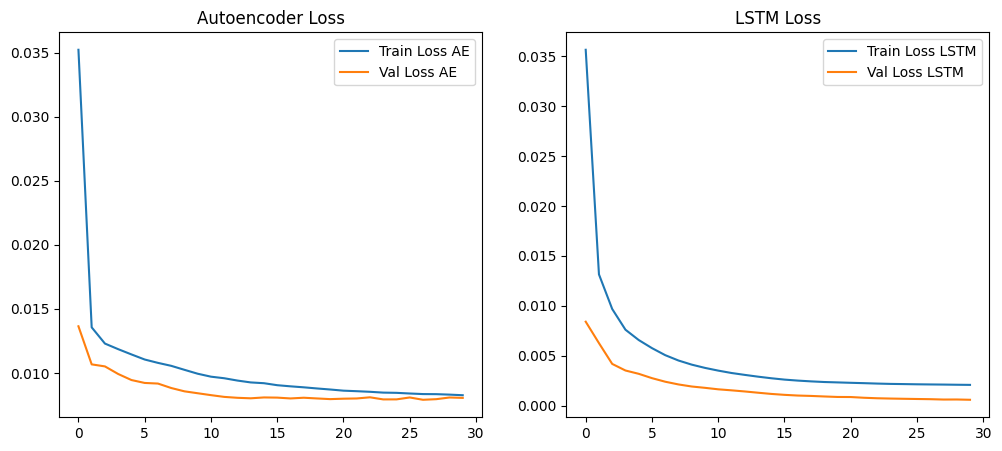

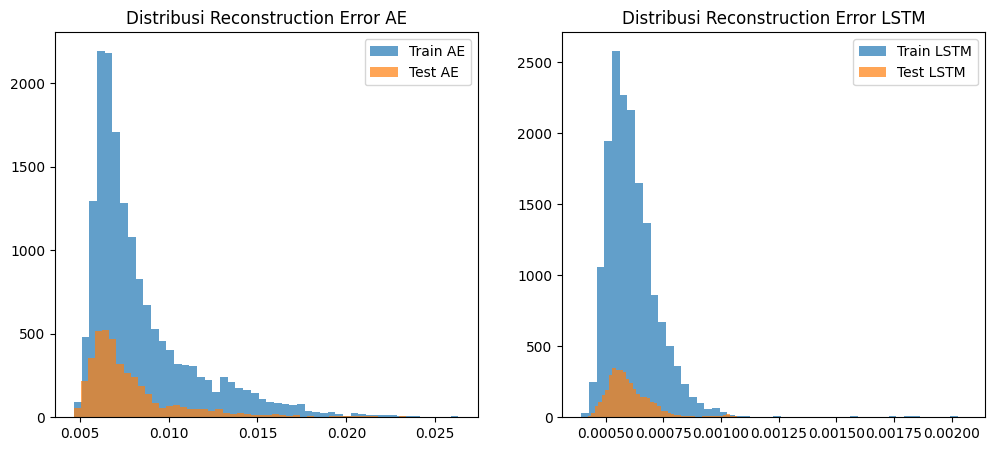


✅ Evaluasi selesai!


In [ ]:
# =========================================
# DETEKSI ANOMALI MESIN PESAWAT
# AUTOENCODER & LSTM AUTOENCODER
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, TimeDistributed
from tensorflow.keras.optimizers import Adam

# ====================================================
# 1. Load dataset CMAPSS (contoh FD001)
# ====================================================
df = pd.read_csv("train_FD001.csv", sep=" ", header=None)
df.dropna(axis=1, inplace=True)  # hapus kolom kosong

col_names = ["unit", "cycle"] + [f"sensor{i}" for i in range(1, df.shape[1]-1)]
df.columns = col_names

print("🔹 Data awal:")
print(df.head())

# ====================================================
# 2. Normalisasi sensor (MinMaxScaler)
# ====================================================
sensor_cols = [f"sensor{i}" for i in range(1, 22)]
scaler = MinMaxScaler()
df[sensor_cols] = scaler.fit_transform(df[sensor_cols])

print("\n✅ Normalisasi selesai")
print(df.head())

# ====================================================
# 3. Bentuk data deret waktu (windowing)
# ====================================================
def create_sequences(data, seq_length=30):
    xs = []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        xs.append(x)
    return np.array(xs)

data_seq = create_sequences(df[sensor_cols].values, seq_length=30)
print(f"\n🔹 Bentuk data windowing: {data_seq.shape}  # (samples, timesteps, features)")

# Split train & test
split = int(0.8 * len(data_seq))
X_train, X_test = data_seq[:split], data_seq[split:]
print("X_train:", X_train.shape, "X_test:", X_test.shape)

# ====================================================
# 4. Model Autoencoder
# ====================================================
autoencoder = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1]*X_train.shape[2],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(X_train.shape[1]*X_train.shape[2], activation='linear')
])
autoencoder.compile(optimizer=Adam(1e-3), loss='mse')

# Flatten data untuk Autoencoder
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat  = X_test.reshape(X_test.shape[0], -1)

hist_ae = autoencoder.fit(X_train_flat, X_train_flat,
                          epochs=30,
                          batch_size=64,
                          validation_split=0.2,
                          verbose=1)

# ====================================================
# 5. Model LSTM Autoencoder
# ====================================================
timesteps = X_train.shape[1]   # 30
features = X_train.shape[2]    # 21

lstm_model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(timesteps, features)),
    Dropout(0.3),
    LSTM(32, activation='tanh', return_sequences=True),
    Dropout(0.3),
    TimeDistributed(Dense(features, activation='linear'))
])
lstm_model.compile(optimizer='adam', loss='mse')

hist_lstm = lstm_model.fit(X_train, X_train,
                           epochs=30,
                           batch_size=64,
                           validation_split=0.2,
                           verbose=1)

# ====================================================
# 6. Evaluasi Model
# ====================================================
def evaluate_model(model, X_train, X_test, flat=False):
    if flat:  # Autoencoder
        X_train_pred = model.predict(X_train_flat)
        X_test_pred  = model.predict(X_test_flat)
        err_train = np.mean(np.power(X_train_flat - X_train_pred, 2), axis=1)
        err_test  = np.mean(np.power(X_test_flat - X_test_pred, 2), axis=1)
    else:     # LSTM
        X_train_pred = model.predict(X_train)
        X_test_pred  = model.predict(X_test)
        err_train = np.mean(np.power(X_train - X_train_pred, 2), axis=(1,2))
        err_test  = np.mean(np.power(X_test - X_test_pred, 2), axis=(1,2))

    return err_train, err_test

# Evaluasi Autoencoder
err_train_ae, err_test_ae = evaluate_model(autoencoder, X_train, X_test, flat=True)

# Evaluasi LSTM Autoencoder
err_train_lstm, err_test_lstm = evaluate_model(lstm_model, X_train, X_test, flat=False)

# ====================================================
# 7. Visualisasi
# ====================================================
# Loss Curve
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(hist_ae.history['loss'], label='Train Loss AE')
plt.plot(hist_ae.history['val_loss'], label='Val Loss AE')
plt.legend(); plt.title("Autoencoder Loss")

plt.subplot(1,2,2)
plt.plot(hist_lstm.history['loss'], label='Train Loss LSTM')
plt.plot(hist_lstm.history['val_loss'], label='Val Loss LSTM')
plt.legend(); plt.title("LSTM Loss")
plt.show()

# Histogram Error
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(err_train_ae, bins=50, alpha=0.7, label="Train AE")
plt.hist(err_test_ae, bins=50, alpha=0.7, label="Test AE")
plt.legend(); plt.title("Distribusi Reconstruction Error AE")

plt.subplot(1,2,2)
plt.hist(err_train_lstm, bins=50, alpha=0.7, label="Train LSTM")
plt.hist(err_test_lstm, bins=50, alpha=0.7, label="Test LSTM")
plt.legend(); plt.title("Distribusi Reconstruction Error LSTM")
plt.show()

print("\n✅ Evaluasi selesai!")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input
from tensorflow.keras.optimizers import Adam

# Buat model Autoencoder
autoencoder = Sequential([
    Input(shape=(X_seq.shape[1], X_seq.shape[2])),  # (30, 3)
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(X_seq.shape[1] * X_seq.shape[2], activation='linear'),
    Reshape((X_seq.shape[1], X_seq.shape[2]))  # (30, 3)
])

# Kompilasi
autoencoder.compile(optimizer=Adam(0.001), loss='mse')

# Latih model
history_ae = autoencoder.fit(
    X_seq, X_seq,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0391 - val_loss: 0.0117
Epoch 2/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0110 - val_loss: 0.0080
Epoch 3/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0078 - val_loss: 0.0070
Epoch 4/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0069 - val_loss: 0.0063
Epoch 5/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0066 - val_loss: 0.0064
Epoch 6/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0065 - val_loss: 0.0063
Epoch 7/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0065 - val_loss: 0.0063
Epoch 8/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0065 - val_loss: 0.0063
Epoch 9/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0065 - val_loss: 0.0063
Epoch 10/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0065 - val_loss: 0.0064
Epoch 11/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0065 - val_loss: 0.0063
Epoch 12/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input
from tensorflow.keras.optimizers import Adam

# Buat model Autoencoder
autoencoder = Sequential([
    Input(shape=(X_seq.shape[1], X_seq.shape[2])),  # (30, 3)
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(X_seq.shape[1] * X_seq.shape[2], activation='linear'),
    Reshape((X_seq.shape[1], X_seq.shape[2]))  # (30, 3)
])

# Kompilasi
autoencoder.compile(optimizer=Adam(0.001), loss='mse')

# Latih model
history_ae = autoencoder.fit(
    X_seq, X_seq,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0315 - val_loss: 0.0112
Epoch 2/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0103 - val_loss: 0.0074
Epoch 3/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0075 - val_loss: 0.0070
Epoch 4/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0072 - val_loss: 0.0070
Epoch 5/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0072 - val_loss: 0.0070
Epoch 6/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0072 - val_loss: 0.0070
Epoch 7/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0072 - val_loss: 0.0070
Epoch 8/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0072 - val_loss: 0.0070
Epoch 9/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0072 - val_loss: 0.0070
Epoch 10/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 11/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 12/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_ae.history['loss'], label='Train Loss')
plt.plot(history_ae.history['val_loss'], label='Val Loss')
plt.title('Autoencoder Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Input
from tensorflow.keras.optimizers import Adam

timesteps = X_seq.shape[1]   # 30
n_features = X_seq.shape[2]  # 3

# Input Layer
input_lstm = Input(shape=(timesteps, n_features))

# Encoder
encoded = LSTM(64, activation='relu', return_sequences=True)(input_lstm)
encoded = LSTM(32, activation='relu')(encoded)

# Bottleneck
decoded = RepeatVector(timesteps)(encoded)

# Decoder
decoded = LSTM(32, activation='relu', return_sequences=True)(decoded)
decoded = LSTM(64, activation='relu', return_sequences=True)(decoded)
decoded = TimeDistributed(Dense(n_features))(decoded)

# Model
lstm_autoencoder = Model(inputs=input_lstm, outputs=decoded)
lstm_autoencoder.compile(optimizer=Adam(0.001), loss='mse')

# Training
history_lstm = lstm_autoencoder.fit(
    X_seq, X_seq,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


In [ ]:
plt.plot(history_lstm.history['loss'], label='Train Loss (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Val Loss (LSTM)')
plt.title('LSTM Autoencoder Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# Gunakan model yang sudah dilatih: autoencoder atau lstm_autoencoder
# Misal kita pakai lstm_autoencoder
X_pred = lstm_autoencoder.predict(X_seq)
reconstruction_error = np.mean(np.mean(np.square(X_seq - X_pred), axis=2), axis=1)  # MSE per sample

# Tentukan threshold (rata-rata + 3 std deviasi)
threshold = np.mean(reconstruction_error) + 3 * np.std(reconstruction_error)
print("Threshold MSE untuk deteksi anomali:", threshold)

# Tandai sebagai anomali jika error > threshold
anomaly_flags = reconstruction_error > threshold


In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(reconstruction_error, label='Reconstruction Error')
plt.hlines(threshold, xmin=0, xmax=len(reconstruction_error), colors='r', label='Threshold')
plt.title('Anomaly Detection via Reconstruction Error')
plt.xlabel('Data Index')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install keras-tuner --quiet

from keras_tuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input
from tensorflow.keras.optimizers import Adam


In [ ]:
def build_autoencoder(hp):
    model = Sequential()
    model.add(Input(shape=(X_seq.shape[1], X_seq.shape[2])))
    model.add(Flatten())

    # Hidden Layer 1
    model.add(Dense(hp.Int('units1', min_value=32, max_value=128, step=32),
                    activation=hp.Choice('act1', ['relu', 'tanh'])))

    # Hidden Layer 2
    model.add(Dense(hp.Int('units2', min_value=16, max_value=64, step=16),
                    activation=hp.Choice('act2', ['relu', 'tanh'])))

    # Output
    model.add(Dense(X_seq.shape[1] * X_seq.shape[2], activation='linear'))
    model.add(Reshape((X_seq.shape[1], X_seq.shape[2])))

    model.compile(
        optimizer=Adam(hp.Choice('lr', [1e-2, 1e-3, 1e-4])),
        loss='mse'
    )
    return model


In [ ]:
tuner = RandomSearch(
    build_autoencoder,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='autoencoder_tuning',
    project_name='AE_CMAPSS'
)


In [ ]:
tuner.search(X_seq, X_seq, epochs=30, validation_split=0.2, batch_size=32, verbose=1)


In [ ]:
tuner.search(X_seq, X_seq, epochs=30, validation_split=0.2, batch_size=32, verbose=1)


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(f"Units 1: {best_hp.get('units1')}")
print(f"Units 2: {best_hp.get('units2')}")
print(f"Activation 1: {best_hp.get('act1')}")
print(f"Activation 2: {best_hp.get('act2')}")
print(f"Learning Rate: {best_hp.get('lr')}")


In [ ]:
import pandas as pd

df = pd.read_csv("train_FD001.csv", delim_whitespace=True, header=None)
df.dropna(axis=1, inplace=True)

df.columns = [
    "unit_number", "time_in_cycles", "op_setting_1", "op_setting_2", "op_setting_3"
] + [f"sensor_{i}" for i in range(1, 22)]

print("Jumlah total baris data:", df.shape[0])
print("Jumlah unit unik (mesin):", df["unit_number"].nunique())


In [ ]:
# Ambil kolom parameter operasional dan sensor
param_cols = ["op_setting_1", "op_setting_2", "op_setting_3"] + [f"sensor_{i}" for i in range(1, 22)]
param_df = df[param_cols]

# Tampilkan statistik deskriptif
param_df.describe()


In [ ]:
# Cari sensor yang variansinya nol → artinya konstan
constant_sensors = param_df.loc[:, param_df.std() == 0].columns.tolist()
print("Sensor yang tidak berubah (konstan):", constant_sensors)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi 3 setting operasi
plt.figure(figsize=(12,4))
for i, col in enumerate(["op_setting_1", "op_setting_2", "op_setting_3"]):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()


In [ ]:
df[["sensor_2"]].describe()
